In [1]:
import os
import glob
import sys
import importlib
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl
# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

In [2]:
util.set_sns_style(style='dark')
%matplotlib notebook

In [3]:
root_dir = '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
root_dir = os.path.join(root_dir, 'jyr')
experiment = 'vertical_strip/paired_experiments' 

fig_id = os.path.join(root_dir.split('/My Drive')[1], experiment)
src_dir = os.path.join(root_dir, experiment)
save_dir = '/Users/julianarhee/Documents/rutalab/data/figures/{}/rdp'.format(experiment)
save_dir = save_dir.replace(" ", "")

print("Saving figures to:{}    {}".format('\n', save_dir))
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

Saving figures to:
    /Users/julianarhee/Documents/rutalab/data/figures/vertical_strip/paired_experiments/rdp


In [188]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [5]:
log_files = sorted([k for k in glob.glob(os.path.join(src_dir, 'raw', '*.log'))\
                if 'lossed tracking' not in k], key=util.natsort)
print("Found {} tracking files.".format(len(log_files)))
#log_files

Found 38 tracking files.


Creating new combined df from raw files...
Found 38 tracking files.


<IPython.core.display.Javascript object>


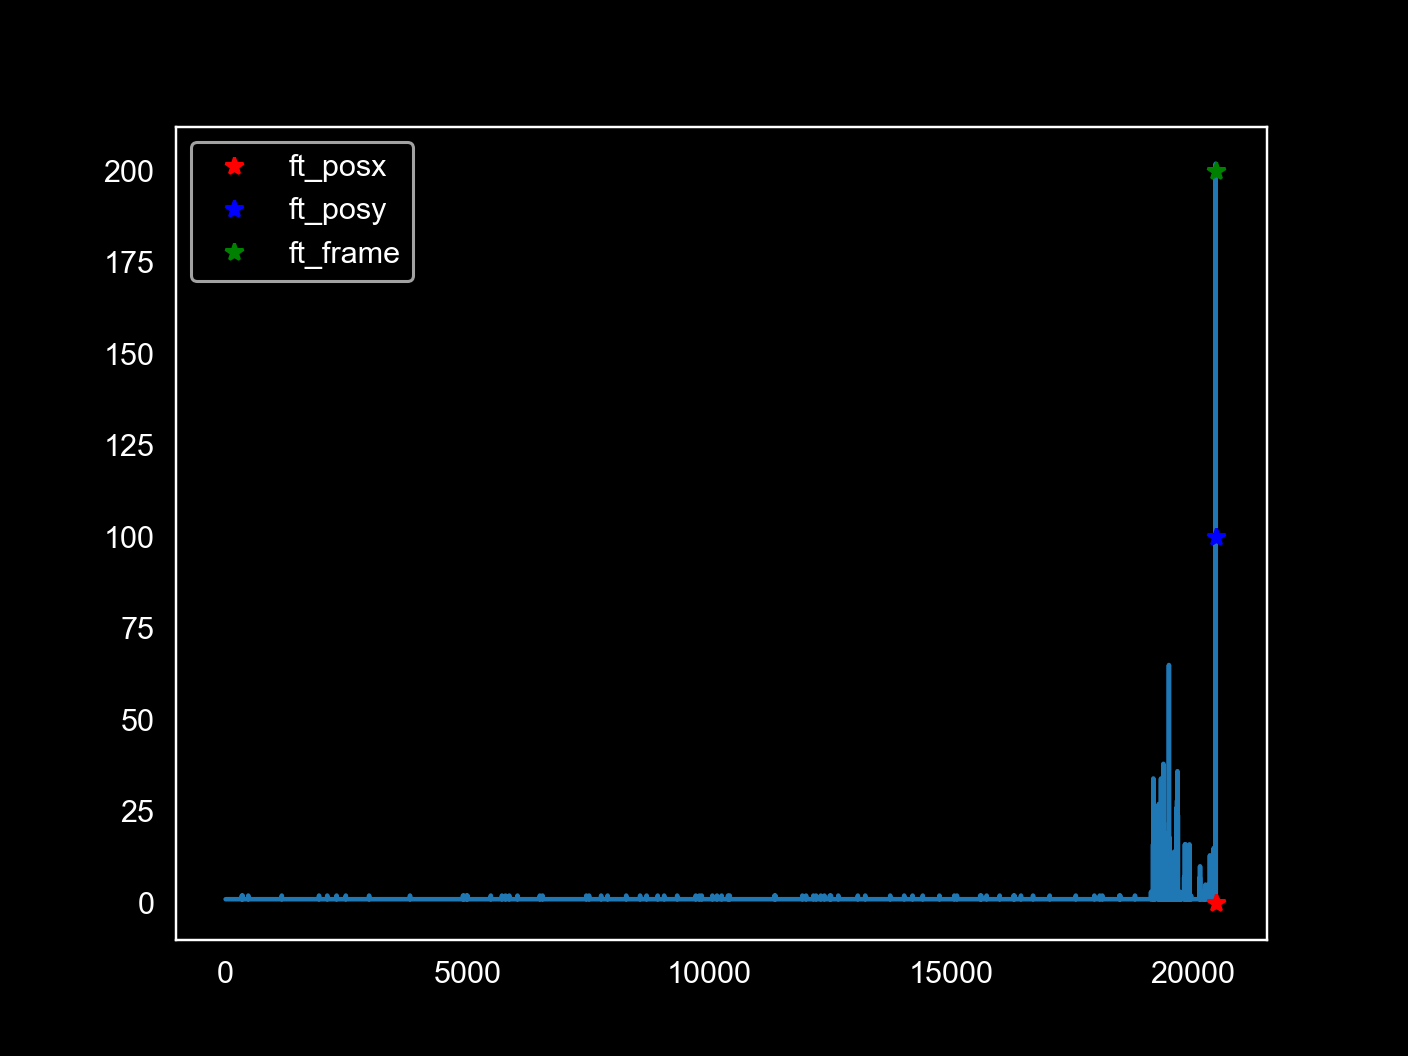

Removing 40 of 20519 samples.
--> found wonky FTs, check: /Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/jyr/vertical_strip/paired_experiments/raw/07202020-193426_fly9_odor.log
Saving combined df to: /Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/jyr/vertical_strip/paired_experiments


array(['air', 'odor', 'reinforced', 'lightonly', 'light'], dtype=object)

In [15]:
# # Load dataframes
df0 = butil.load_combined_df(os.path.join(src_dir, 'raw'), create_new=True)
df0['condition'].unique()

In [16]:
df0.loc[df0['condition']=='light', 'condition'] = 'lightonly'

In [17]:
butil.save_df(df0, os.path.join(src_dir, 'combined_df.pkl'))

In [18]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [34]:
# get odor border for each fly
odor_cond='odor' if len(df0['condition'].unique())>1 else None
odor_cond = None
odor_width=50
odor_borders = butil.get_odor_grid_all_flies(df0, odor_width=odor_width)

/Users/julianarhee/Repositories/plume-tracking/behavior.py:669: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for trial_id, currdf in df0.groupby(['trial_id']):


20200630-fly1_06302020-162733 WARNING: Fly never in odor (cond=['air'])
20200630-fly2_06302020-180905 WARNING: Fly never in odor (cond=['air'])
20200630-fly3_06302020-194033 WARNING: Fly never in odor (cond=['air'])
20200708-fly4_07082020-191757 WARNING: Fly never in odor (cond=['lightonly'])
20200708-fly4_07082020-193536 WARNING: Fly never in odor (cond=['air'])
20200708-fly4b_07082020-203545 WARNING: Fly never in odor (cond=['air'])
20200708-fly4b_07082020-205627 WARNING: Fly never in odor (cond=['lightonly'])
20200708-fly5_07082020-214909 WARNING: Fly never in odor (cond=['air'])
20200710-fly6_07102020-172856 WARNING: Fly never in odor (cond=['air'])
20200710-fly6_07102020-180304 WARNING: Fly never in odor (cond=['lightonly'])
20200710-fly6b_07102020-183034 WARNING: Fly never in odor (cond=['air'])
20200710-fly7_07102020-195727 WARNING: Fly never in odor (cond=['air'])
20200710-fly7_07102020-204239 WARNING: Fly never in odor (cond=['lightonly'])
20200710-fly8_07102020-214902 WARNING

In [35]:
smooth_window=11
df0 = butil.process_df(df0, smooth=True, window_size=smooth_window) #, conditions=['odor'])

# 1 fly

In [425]:
df0['fly_id'].unique()

array(['20200630-fly1', '20200630-fly2', '20200630-fly3', '20200708-fly4',
       '20200708-fly4b', '20200708-fly5', '20200710-fly6',
       '20200710-fly6b', '20200710-fly7', '20200710-fly8',
       '20200720-fly10', '20200720-fly9'], dtype=object)

In [426]:
fly_id = '20200630-fly2' #'20220530-fly0'
currcond='reinforced'
df1 = df0[(df0['fly_id']==fly_id) & (df0['condition']==currcond)].copy()
trial_id = df1['trial_id'].unique()[0]

In [427]:
oparams = butil.get_odor_params(df1[df1['condition']==currcond])
oparams

{'trial_start_time': 1593558104.761543,
 'odor_start_time': 1593558104.761543,
 'odor_boundary': (-25.118905910830094, 24.881094089169906),
 'odor_start_pos': (-0.118905910830093, 0.176391606550383),
 'entry_left': None}

In [428]:
df = df1[df1['time']>=oparams['odor_start_time']].copy()

In [429]:
importlib.reload(util)

<module 'utils' from '/Users/julianarhee/Repositories/plume-tracking/utils.py'>

<IPython.core.display.Javascript object>


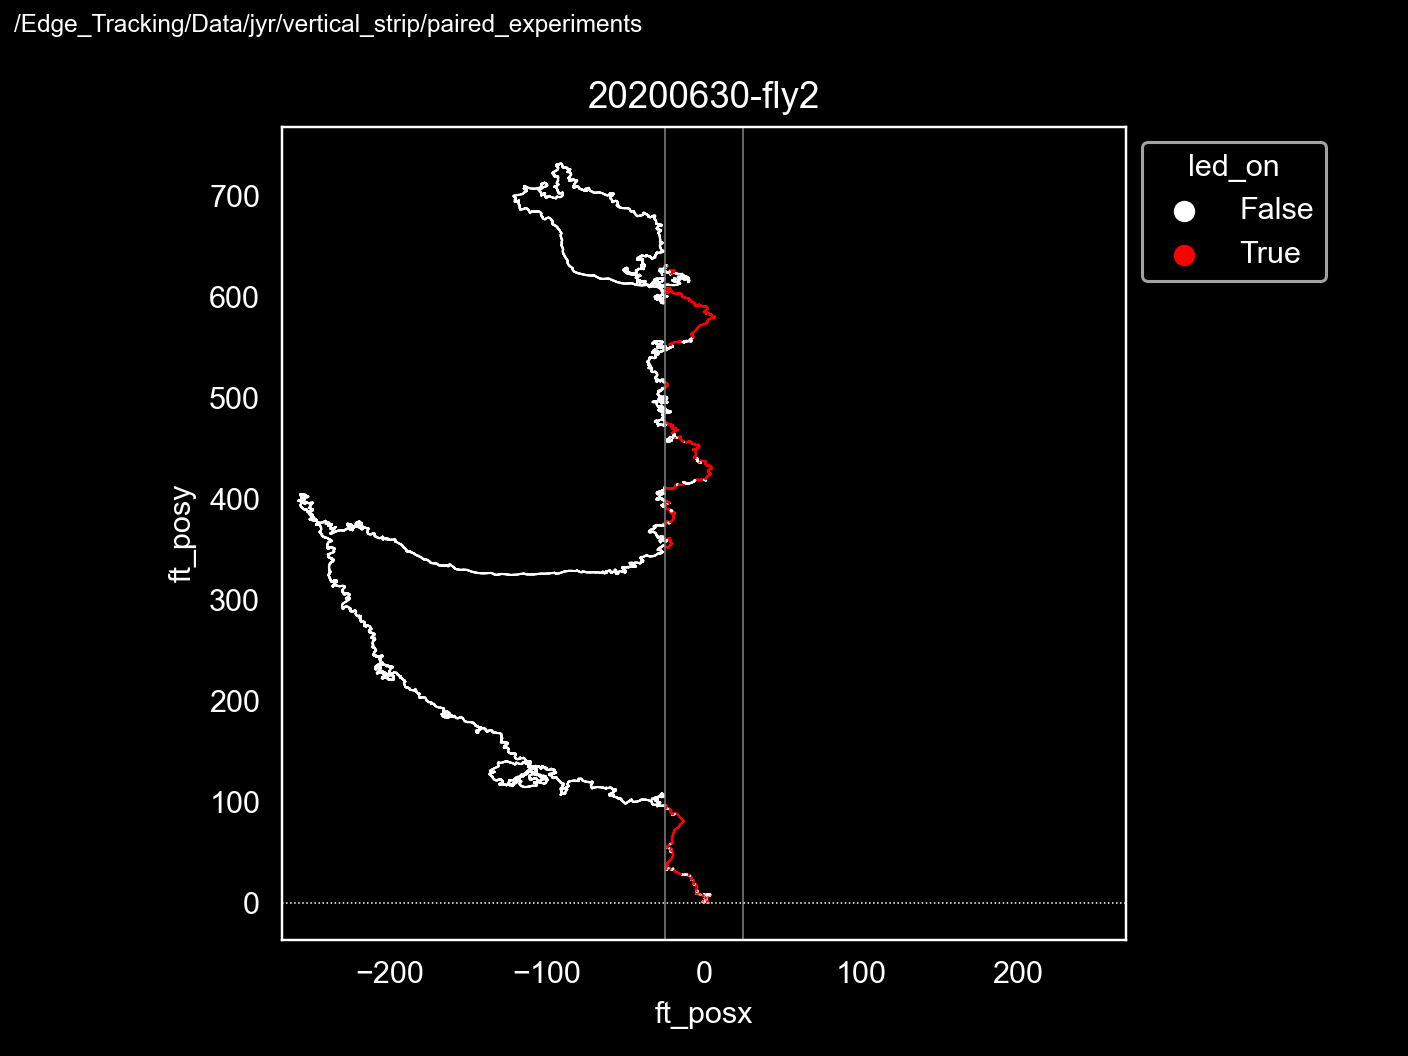

In [430]:
fig, ax= pl.subplots()
butil.plot_trajectory(df, odor_bounds=[odor_borders[trial_id]], ax=ax, hue_varname='led_on')
ax.set_title(fly_id)
util.label_figure(fig, fig_id)

In [431]:
def make_continuous(mapvals):
    map_c = mapvals.copy()
    map_c = -1*map_c
    map_c = map_c % (2*np.pi)
    return map_c

def convert_cw(v):
    vv=v.copy()
    vv[v<0] += 2*np.pi
#     if angle < 0:
#         angle += 2 * math.pi
    #vv = (180. / np.pi) * v
    return vv  #(180 / math.pi) * angle

def convert_ccw(v):
    vv = v.copy()
    vv[v>0] -= 2*np.pi
#     if angle > 0:
#         angle -= 2 * math.pi
    #vv = (180 / np.pi) * v # rad to deg conversion
    return vv #v #(180 / math.pi) * angle  # rad to deg conversion


def convert_ft(v):
    vv = v.copy()
    vv[v<0] += 2*np.pi
    vv[v>2*np.pi] -= 2*np.pi
    return vv #v #(180 / math.pi) * angle  # rad to deg conversion


import math
def calculate_2d_rotmat(u):
    v=(0, 1)
    v1 = u / np.linalg.norm(u)
    #v2 = (0, 1)
    #theta = np.arccos( np.dot(v1, v) )
    #deg = np.rad2deg(theta)
    #print(theta, deg)
    theta = math.atan2(v1[1], v1[0]) - math.atan2(v[1], v[0])
    #theta = np.arccos( np.dot(v1, v) )
    rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return theta

#CM_PI / 180.0;

# rdp

In [432]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [433]:
smooth = True
xvar='smoothed_ft_posx' if smooth else 'ft_posx'
yvar='smoothed_ft_posy' if smooth else 'ft_posy'
smooth_window=11
rdp_epsilon=1 #0.5 # distance unit (usually, 1mm)
# for varname in ['ft_posx', 'ft_posy']:
#     df = butil.smooth_traces(df, varname=varname, window_size=smooth_window)
# df = butil.smooth_path(df, s=10)
df = butil.smooth_traces(df, window_size=smooth_window, return_same=True)
df = butil.add_rdp_by_bout(df, epsilon=rdp_epsilon, xvar=xvar, yvar=yvar)
df.columns

Index(['timestamp -- motor_step_command', 'mfc1_stpt', 'mfc2_stpt',
       'mfc3_stpt', 'led1_stpt', 'led2_stpt', 'ft_posx', 'ft_posy',
       'ft_heading', 'ft_frame', 'ft_error', 'ft_roll', 'ft_pitch', 'ft_yaw',
       'timestamp', 'motor_step_command', 'time', 'date', 'instrip', 'led_on',
       'experiment', 'fly_name', 'condition', 'trial', 'fly_id', 'trial_id',
       'boutnum', 'rel_time', 'cum_time', 'speed', 'upwind_speed',
       'crosswind_speed', 'euclid_dist', 'upwind_dist', 'crosswind_dist',
       'smoothed_ft_posx', 'smoothed_ft_posy', 'rdp_smoothed_ft_posx',
       'rdp_smoothed_ft_posy'],
      dtype='object')

In [434]:
rdp_var='rdp_smoothed_ft_posx' if smooth else 'rdp_ft_posx'
rdp_dists = butil.get_rdp_distances(df, rdp_var=rdp_var)
sorted_by_dist = rdp_dists\
                    .sort_values(by='crosswind_dist')['boutnum'].unique()

In [435]:
rdp_dist_thresh = 3
incl_bouts = rdp_dists[rdp_dists['crosswind_dist']>rdp_dist_thresh]['boutnum']
print('{} of {} bouts >{} mm'.format(len(incl_bouts), len(rdp_dists['boutnum'].unique()), rdp_dist_thresh))

24 of 25 bouts >3 mm


In [442]:
boutdf = df[df['boutnum'].isin(incl_bouts)].copy()
outbouts = boutdf[~boutdf['instrip']]['boutnum'].unique()
bouts_to_plot = [b for b in sorted_by_dist if b in outbouts]
len(bouts_to_plot)

12

In [443]:
long_dists = rdp_dists[rdp_dists['crosswind_dist']>10]['boutnum']

In [285]:
plot_bouts = [b for b in long_dists if b in bouts_to_plot]
len(plot_bouts)

11

In [286]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

<IPython.core.display.Javascript object>


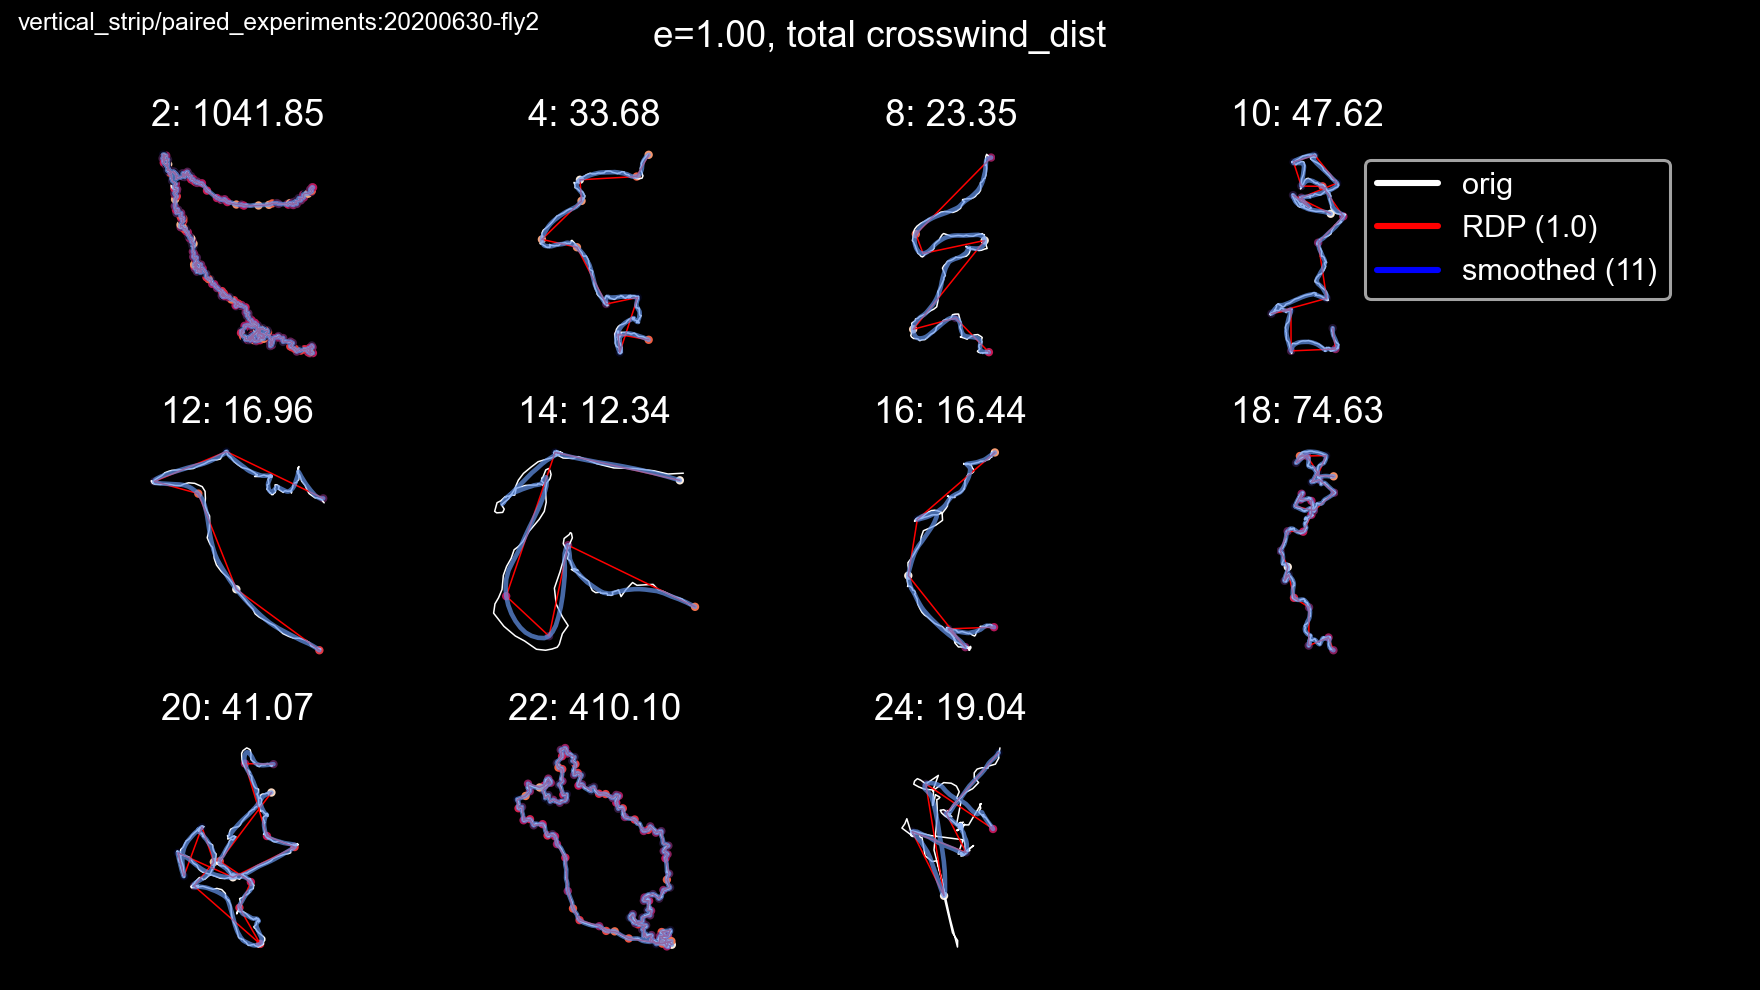

In [79]:
distvar='crosswind_dist'
nr=3
nc=4
plotdf = boutdf[boutdf['boutnum'].isin(plot_bouts)]
fig = butil.plot_overlay_rdp_v_smoothed_multi(plotdf, boutlist=None, nr=nr, nc=nc,
                                  distvar=distvar, xvar=xvar, yvar=yvar)
fig.suptitle('e={:.2f}, total {}'.format(rdp_epsilon, distvar))
util.label_figure(fig, '{}:{}'.format(experiment, fly_id))
pl.tight_layout()

In [1059]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

## test heading

In [287]:
import scipy.stats as sts

In [288]:
grad = np.array([np.gradient(boutdf['smoothed_ft_posy']), \
                 np.gradient(boutdf['smoothed_ft_posx'])]).T
rots = np.array([calculate_2d_rotmat(u) for u in grad])
rots.min(), rots.max()

(-4.711992881868313, 1.5706792112772807)

In [289]:
boutdf['ft_heading_deg'] = np.rad2deg( boutdf['ft_heading'] ) # heading is 0 to 2*np.pi
# df.loc[df['heading_deg']<0, 'heading_deg'] += 360
# returns the angle in radians in the range -math.pi/2 to +math.pi/2 
# between the positive x-axis and the ray to the point (x, y) ≠ (0, 0)
boutdf['heading'] = np.arctan2(np.gradient(boutdf[xvar]), \
                               np.gradient(boutdf[yvar])) # -npi. pi
boutdf['heading_test'] = abs(make_continuous(rots)) # -2*np.pi to 2*pi?
boutdf['heading_cont'] = convert_cw(boutdf['heading']) # 0 to 2*np.pi  

In [290]:
boutdf['heading'].min(), boutdf['heading'].max()

(-3.1411965550734164, 3.1414755380721773)

In [291]:
boutdf['ft_heading_deg'].min(), boutdf['ft_heading_deg'].max()

(0.022827716753927096, 359.9922262188449)

##### test 1

In [122]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [292]:
bnum = 2 #43 #11 #37 #45 #31 #17 #17
b_ = boutdf[boutdf['boutnum']==bnum].copy()

In [293]:
plot_bouts


[2, 4, 8, 10, 12, 14, 16, 18, 20, 22, 24]

<IPython.core.display.Javascript object>


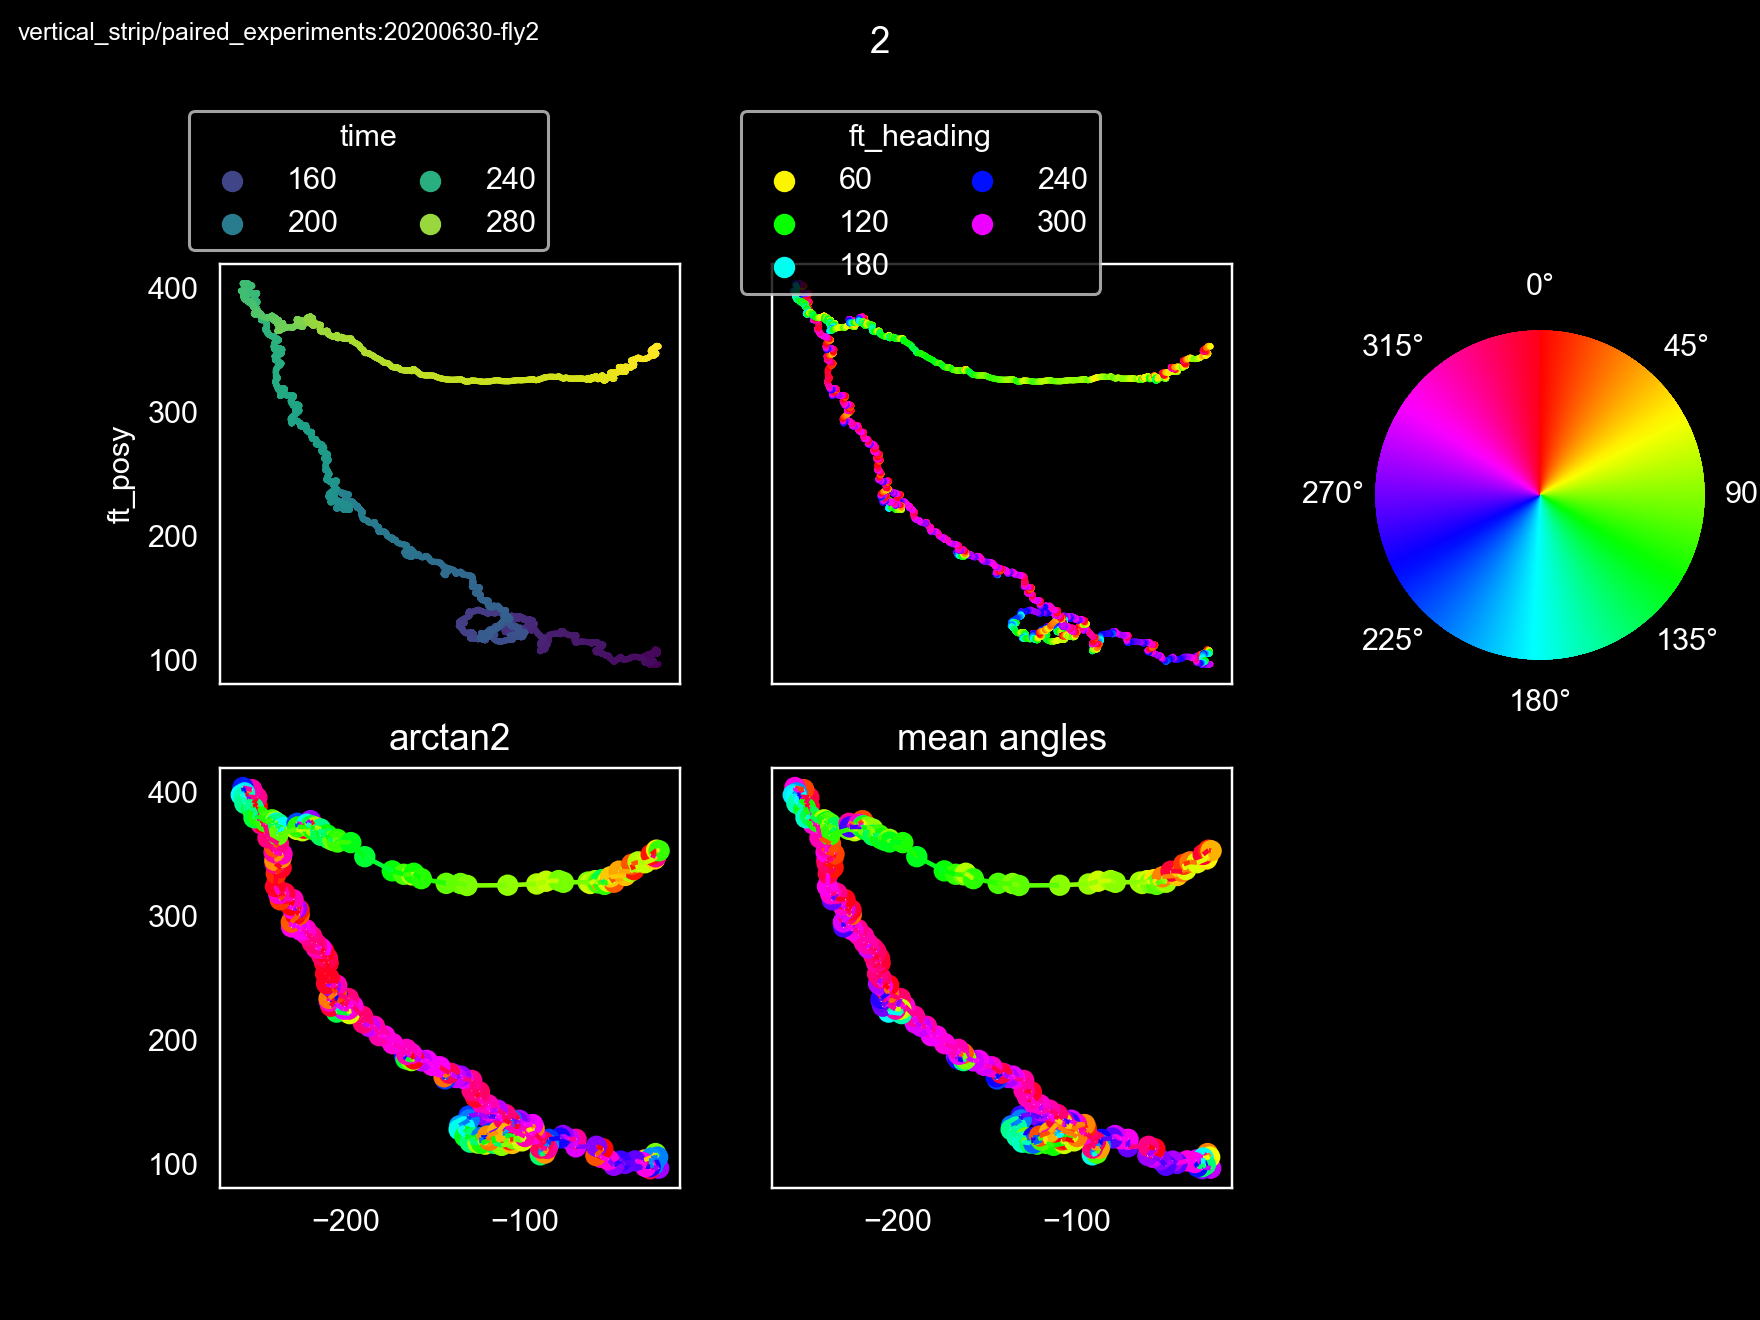

/Users/julianarhee/Documents/rutalab/data/figures/vertical_strip/paired_experiments/rdp 20200630-fly2_06302020-190144_bout2


In [294]:
theta_range = (0, 2*np.pi)
 
fig = butil.examine_heading_in_bout(b_, theta_range=theta_range, xvar=xvar, yvar=yvar)

fig.suptitle(bnum)
pl.subplots_adjust(right=0.7, top=0.8, bottom=0.1)
util.label_figure(fig, '{}:{}'.format(experiment, fly_id))

figname = '{}_bout{}'.format(trial_id, bnum)
#pl.savefig(os.path.join(save_dir, '{}.png'.format(figname)))
print(save_dir, figname)

## sanity check full path

In [295]:
# (odor_xmin, odor_xmax), = ogrid.values()
# odor_xmin

In [296]:
b_ = boutdf[boutdf['boutnum']==2]

<IPython.core.display.Javascript object>


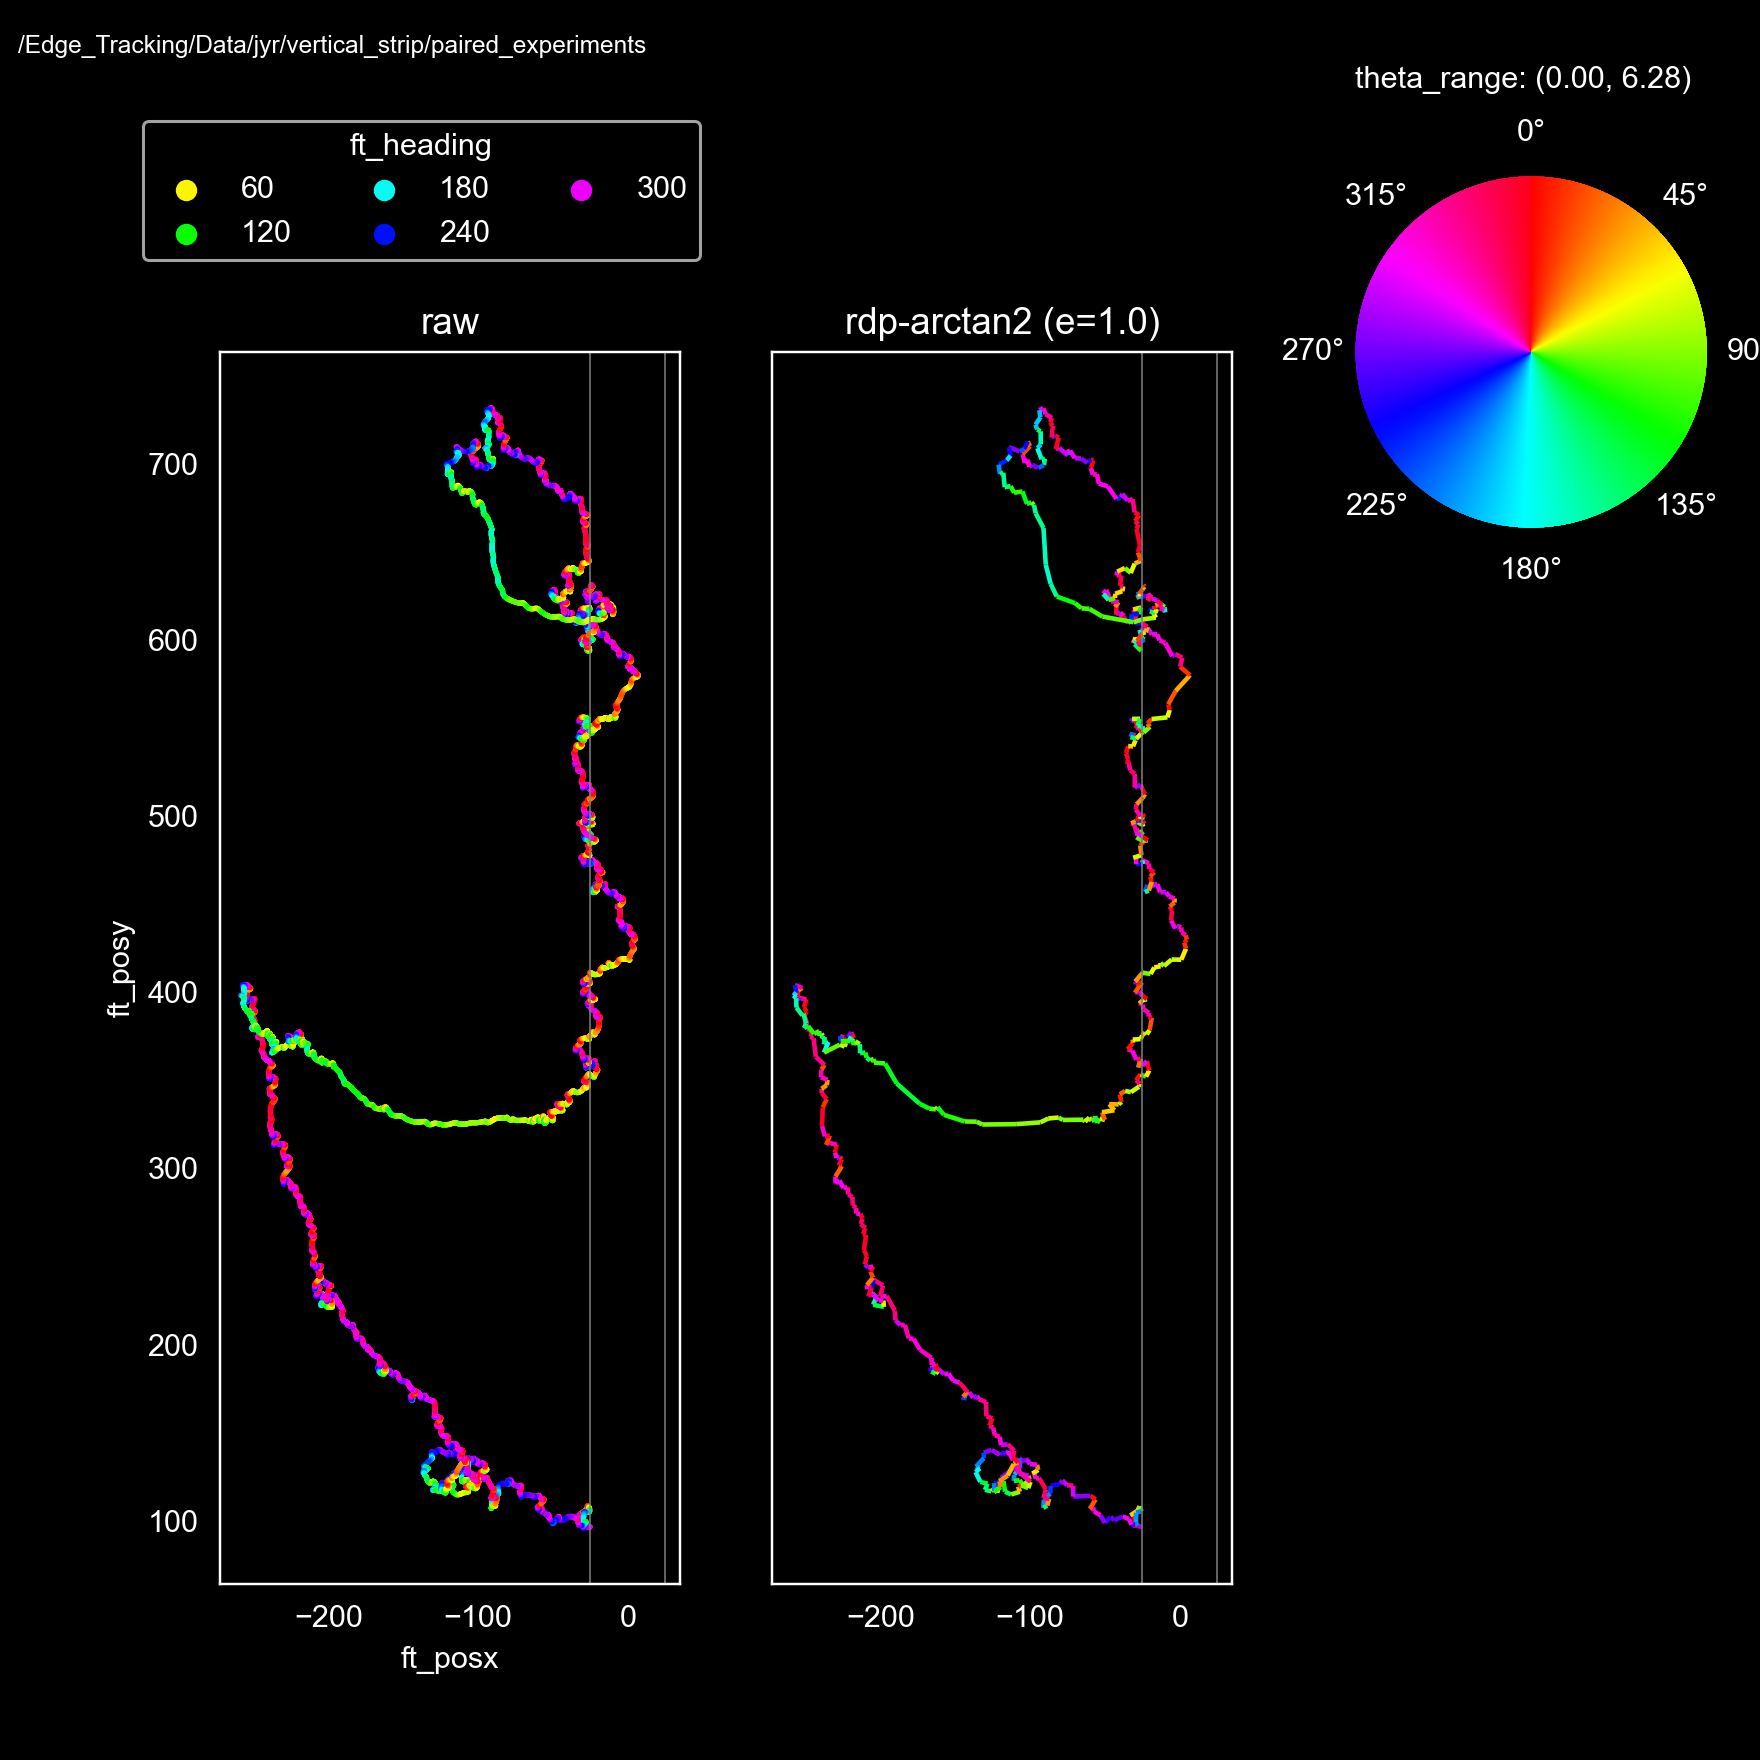

In [297]:
fig, axn = pl.subplots(1, 2, figsize=(8, 8), sharex=True, sharey=True)
ax=axn[0]; ax.set_title('raw')
#axn[0].plot(b_['ft_posx'], b_['ft_posy'], 'w')
sns.scatterplot(data=boutdf, x="ft_posx", y="ft_posy", ax=ax,
                hue='ft_heading_deg', s=3, edgecolor='none', palette='hsv')
ax.legend(bbox_to_anchor=(-0.2, 1.2), ncols=3, loc='upper left', title='ft_heading')
theta_range = (0, 2*np.pi)
cax = util.add_colorwheel(fig, axes=[0.77, 0.7, 0.2, 0.2], 
                          theta_range=theta_range, cmap='hsv') 

ax=axn[1]; ax.set_title('rdp-arctan2 (e={:.1f})'.format(rdp_epsilon))
rdp_x ='rdp_{}'.format(xvar)
rdp_y ='rdp_{}'.format(yvar)
xv = boutdf[boutdf[rdp_x]][xvar]
yv = boutdf[boutdf[rdp_y]][yvar]
angles = convert_cw(np.arctan2(np.gradient(xv*3), np.gradient(yv*3)) )
#ax.scatter(boutdf[boutdf[rdp_x]][xvar], boutdf[boutdf[rdp_y]][yvar], 
#        c=angles, cmap='hsv')
xy = boutdf[boutdf[rdp_var]][[xvar, yvar]].values
xy = xy.reshape(-1, 1, 2)
segments = np.hstack([xy[:-1], xy[1:]])
col2 = mpl.collections.LineCollection(segments, cmap='hsv') #plt.cm.gist_ncar)
col2.set_array(angles) #np.random.random(xy.shape[0]))
ax.add_collection(col2)
fig.text(0.77, 0.95, 'theta_range: ({:.2f}, {:.2f})'.format(theta_range[0], theta_range[1]))

for ax in axn:
    butil.plot_odor_corridor(ax, odor_xmin=odor_borders[trial_id][0], 
                             odor_xmax=odor_borders[trial_id][1])
pl.subplots_adjust(right=0.7, top=0.8, bottom=0.1)


util.label_figure(fig, fig_id)
figname = 'traj-heading_{}'.format(trial_id)
pl.savefig(os.path.join(save_dir, '{}.png'.format(figname)))

In [322]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

## look at stop bouts

In [323]:
save_dir

'/Users/julianarhee/Documents/rutalab/data/figures/vertical_strip/paired_experiments/rdp'

In [334]:
curr_savedir = os.path.join(os.path.split(save_dir)[0], 'stops')
if not os.path.exists(curr_savedir):
    os.makedirs(curr_savedir)
print(curr_savedir)

/Users/julianarhee/Documents/rutalab/data/figures/vertical_strip/paired_experiments/stops


In [325]:
plot_bouts

[2, 4, 8, 10, 12, 14, 16, 18, 20, 22, 24]

In [436]:
bnum = 2 #17 #45 #29
b_ = df[df['boutnum']==bnum].copy()
print(b_.shape)

(11305, 39)


In [437]:
b_.iloc[0::1].shape

(11305, 39)

In [328]:
stopdur_thresh = 0.5
b_ = butil.calculate_speed(b_, xvar='smoothed_ft_posx', yvar='smoothed_ft_posy')
b_ = butil.calculate_stops(b_, stop_thresh=1., speed_varname='speed')
b_ = butil.parse_bouts(b_, count_varname='stopped', bout_varname='stopboutnum')
# b_[b_['stopped']]['stopboutnum'].unique()
b_ = butil.filter_bouts_by_dur(b_, bout_thresh=stopdur_thresh, 
                               count_varname='stopped', bout_varname='stopboutnum')

In [329]:
df['time'].diff().mean()*20

0.3332220089493588

<IPython.core.display.Javascript object>


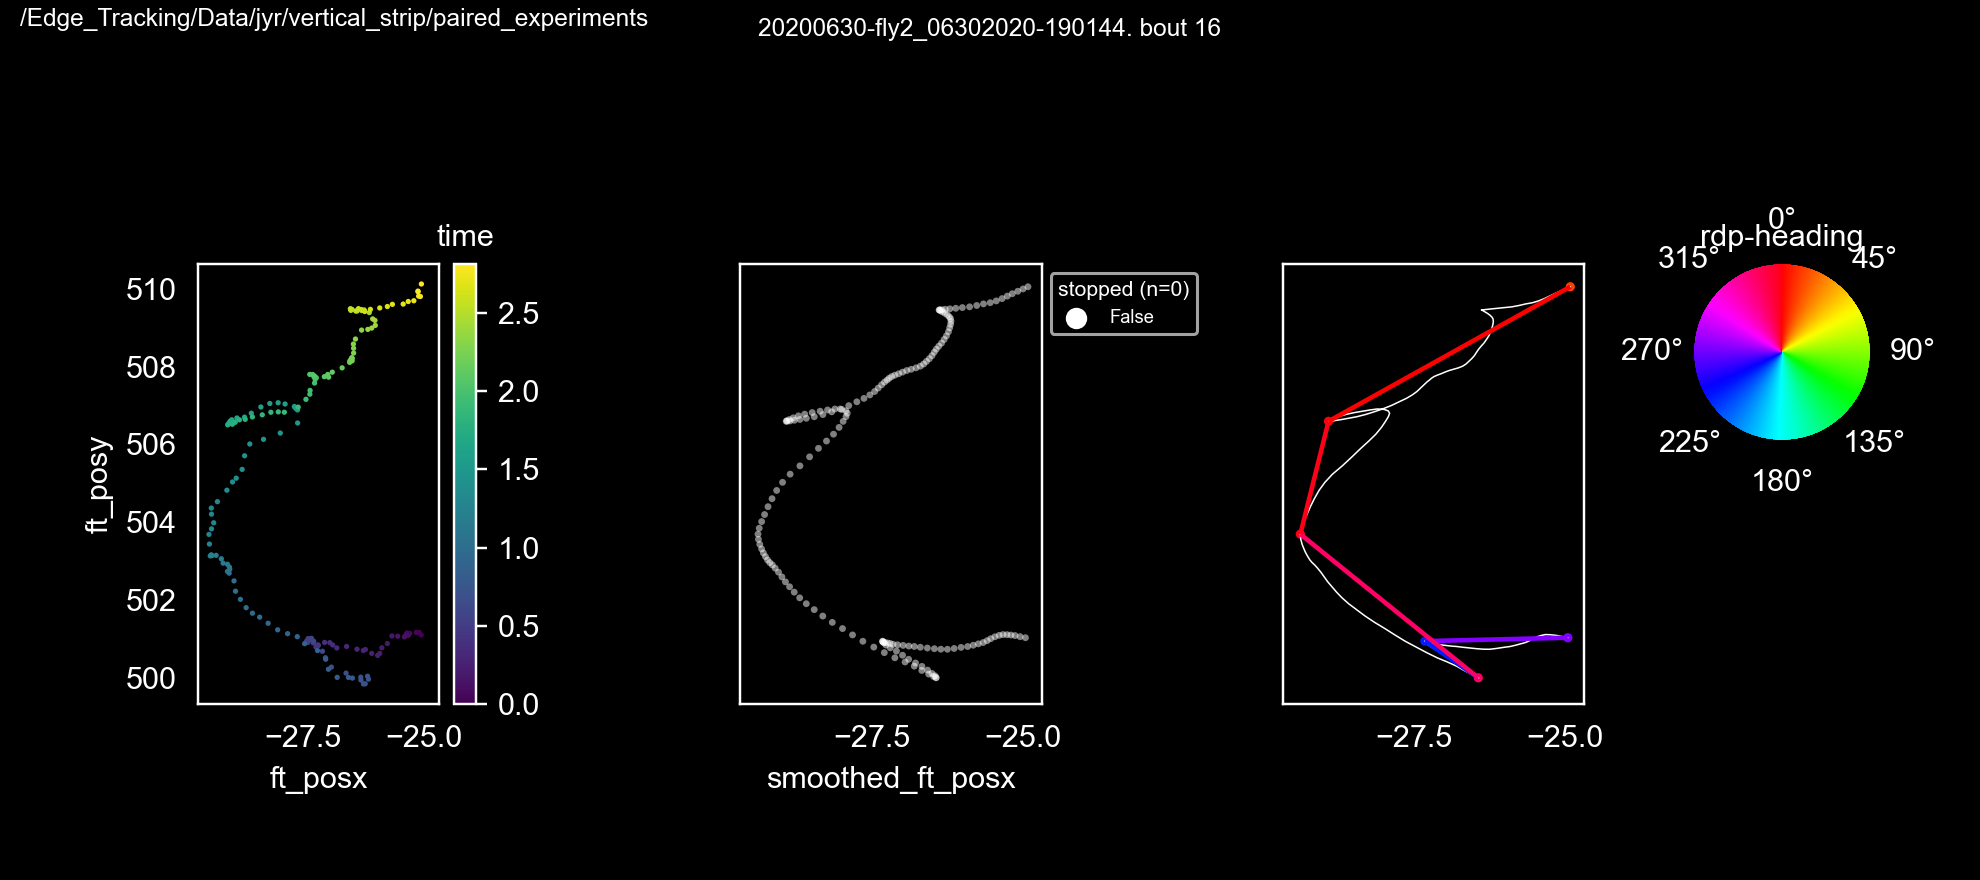

/Users/julianarhee/Documents/rutalab/data/figures/vertical_strip/paired_experiments heading-at-stops_20200630-fly2_06302020-190144_bout16


In [331]:
fig, axn = pl.subplots(1, 3, figsize=(9, 4), sharex=True, sharey=True)
ax=axn[0]
cmap = pl.get_cmap("viridis")
b_['time'] -= b_['time'].iloc[0]
norm = pl.Normalize(b_['time'].min(), b_['time'].max())
sns.scatterplot(data=b_, x="ft_posx", y="ft_posy", ax=ax,
                hue='time', s=3, edgecolor='none', palette=cmap, legend=False)
#ax.legend(bbox_to_anchor=(-0.2, 1.), ncols=2, loc='lower left', title='time')
sm =  mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.ax.set_title("time", fontsize=10)
cbar.ax.tick_params(labelsize=10)
# ---------------------
ax=axn[1]
sns.scatterplot(data=b_.iloc[0::1], x="smoothed_ft_posx", y="smoothed_ft_posy", ax=ax,
                hue='stopped', s=5, edgecolor='none', palette={True: 'r', False: 'w'}, alpha=0.5)
n_stops_in_bout = len(b_[b_['stopped']]['stopboutnum'].unique())
leg = ax.legend(bbox_to_anchor=(1, 1.), ncols=1, loc='upper left', \
          title='stopped (n={})'.format(n_stops_in_bout), fontsize=6)
ax.get_legend()._legend_box.align = "left"
pl.setp(leg.get_title(),fontsize='x-small')
# ---------------------
ax=axn[2]; #ax.set_title('rdp-heading')
rdp_x ='rdp_{}'.format(xvar)
rdp_y ='rdp_{}'.format(yvar)
xv = b_[b_[rdp_x]][xvar]
yv = b_[b_[rdp_y]][yvar]
angles = convert_cw(np.arctan2(np.gradient(xv*3), np.gradient(yv*3)) )
# -- 
ax.plot(b_[xvar], b_[yvar], 'w', lw=0.5)
ax.scatter(b_[b_[rdp_x]][xvar], b_[b_[rdp_y]][yvar], 
        c=angles, cmap='hsv', s=4)
xy = b_[b_[rdp_var]][[xvar, yvar]].values
xy = xy.reshape(-1, 1, 2)
segments = np.hstack([xy[:-1], xy[1:]])
coll = mpl.collections.LineCollection(segments, cmap='hsv') #plt.cm.gist_ncar)
coll.set_array(angles) #np.random.random(xy.shape[0]))
ax.add_collection(coll)
# legend
theta_range = (0, 2*np.pi)
cax = util.add_colorwheel(fig, axes=[0.8, 0.5, 0.2, 0.2], theta_range=theta_range, cmap='hsv') 
cax.set_title('rdp-heading', fontsize=10)
# -----
pl.subplots_adjust(right=0.8, top=0.7, wspace=0.8, bottom=0.2, left=0.1)
fig.suptitle('{}. bout {}'.format(trial_id, bnum), fontsize=8)
util.label_figure(fig, fig_id)

figname = 'heading-at-stops_{}_bout{}'.format(trial_id, bnum)
pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))
print(curr_savedir, figname)

In [274]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [275]:
print(xvar, yvar)

smoothed_ft_posx smoothed_ft_posy


In [381]:
stopdur_thresh=0.25

<IPython.core.display.Javascript object>


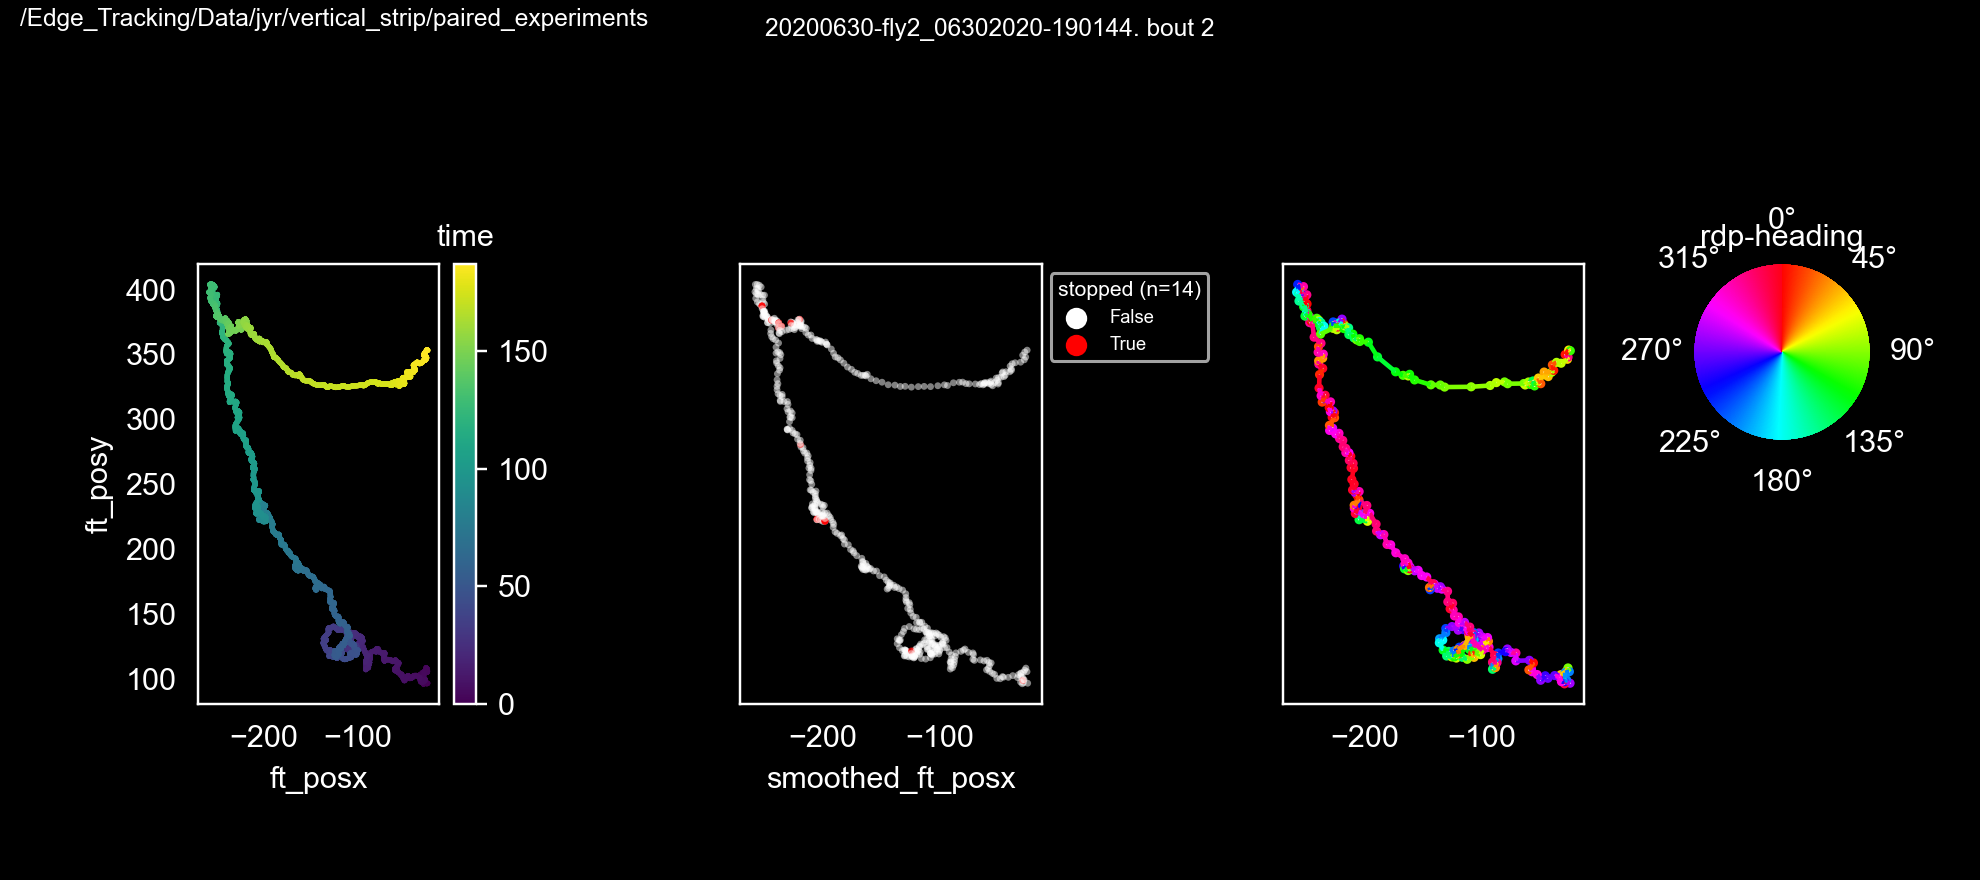

skipping some
/Users/julianarhee/Documents/rutalab/data/figures/vertical_strip/paired_experiments/stops heading-at-stops_20200630-fly2_06302020-190144_bout2


<IPython.core.display.Javascript object>


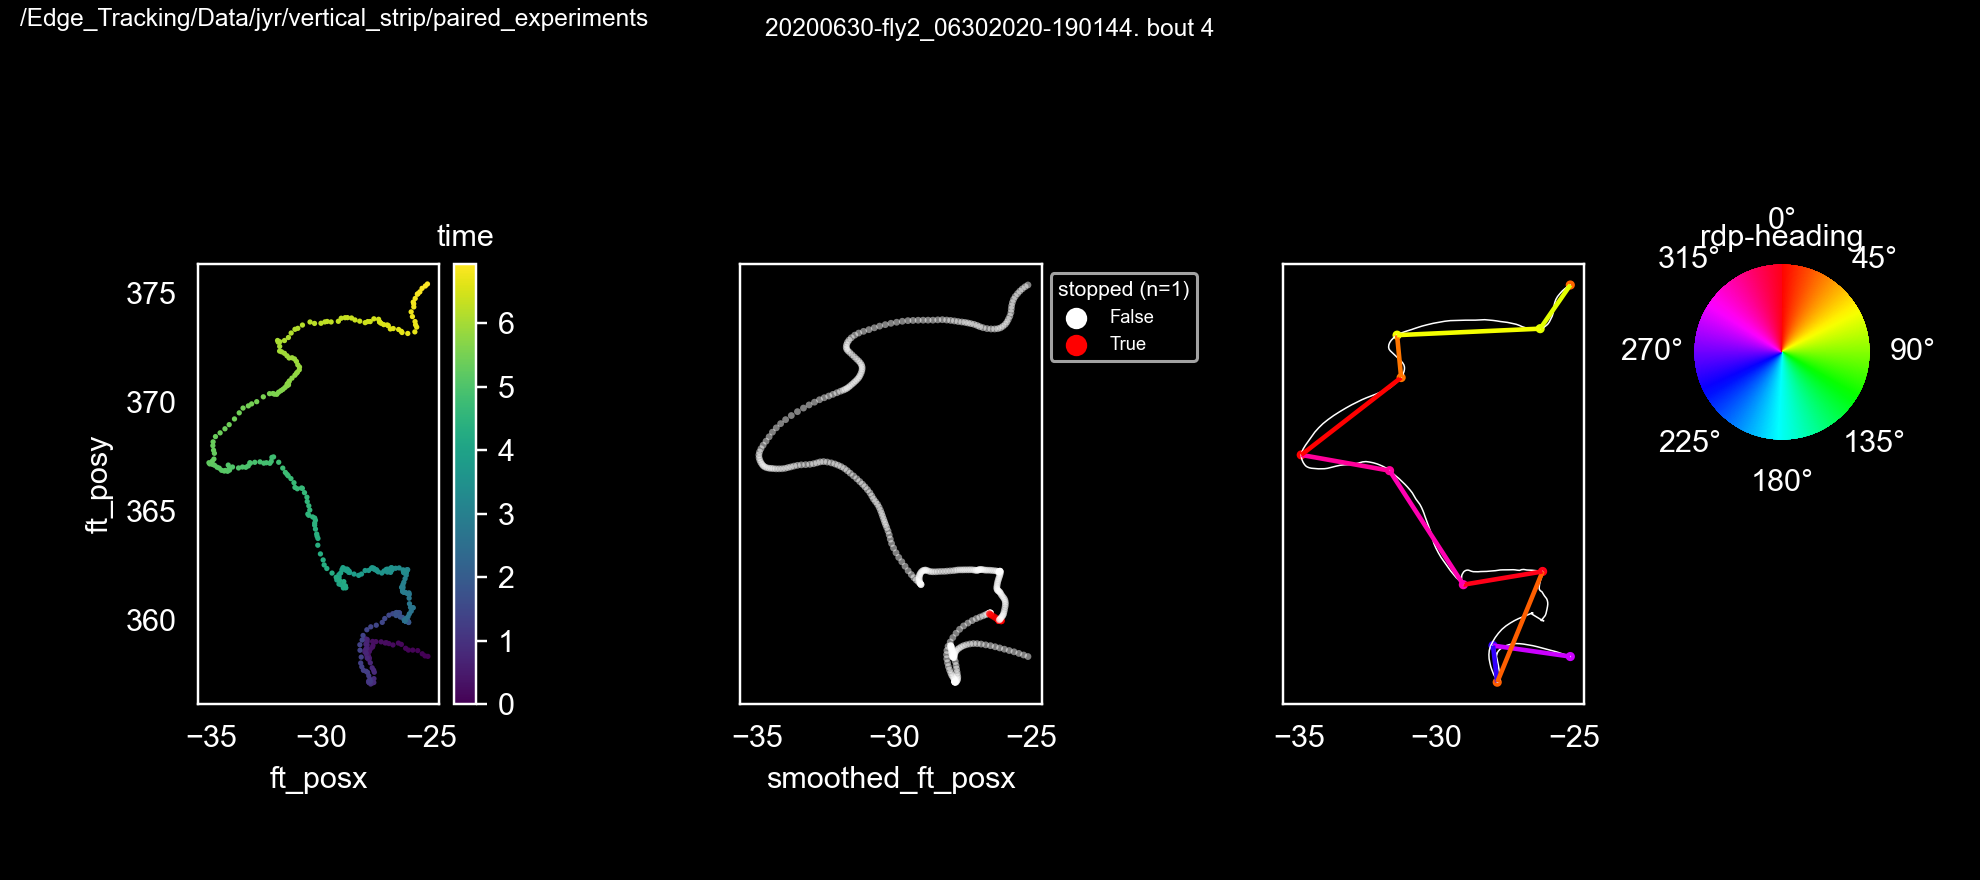

/Users/julianarhee/Documents/rutalab/data/figures/vertical_strip/paired_experiments/stops heading-at-stops_20200630-fly2_06302020-190144_bout4


<IPython.core.display.Javascript object>


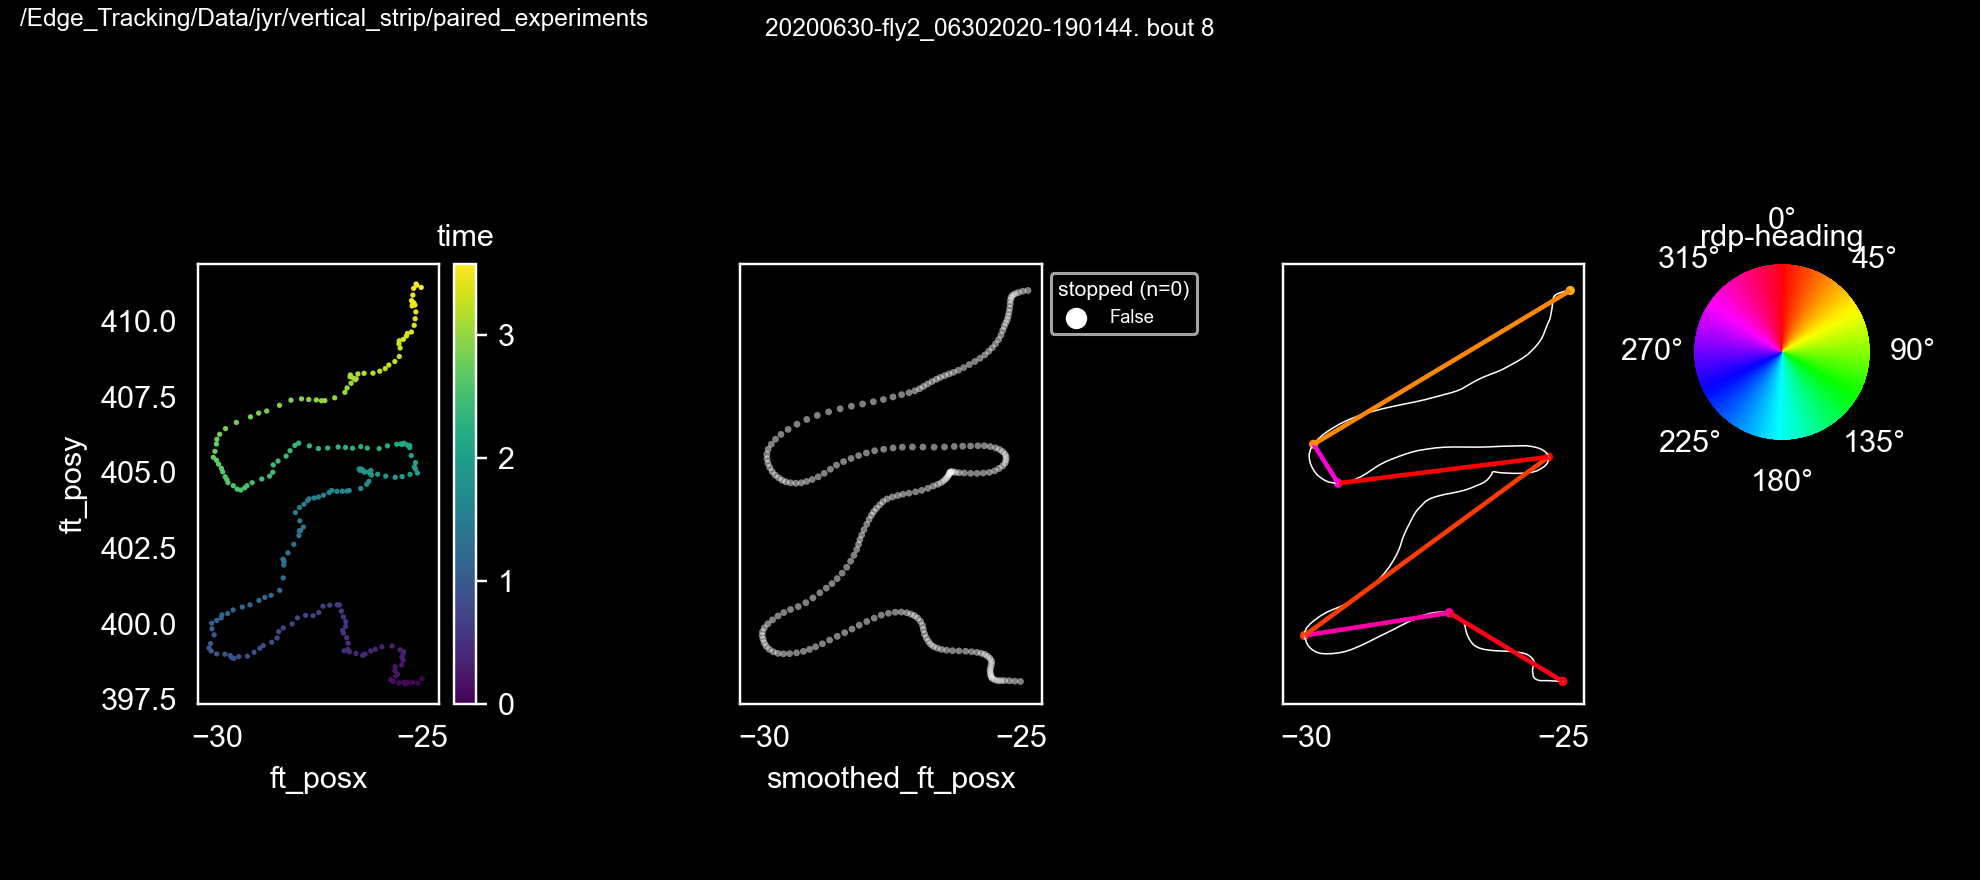

/Users/julianarhee/Documents/rutalab/data/figures/vertical_strip/paired_experiments/stops heading-at-stops_20200630-fly2_06302020-190144_bout8


<IPython.core.display.Javascript object>


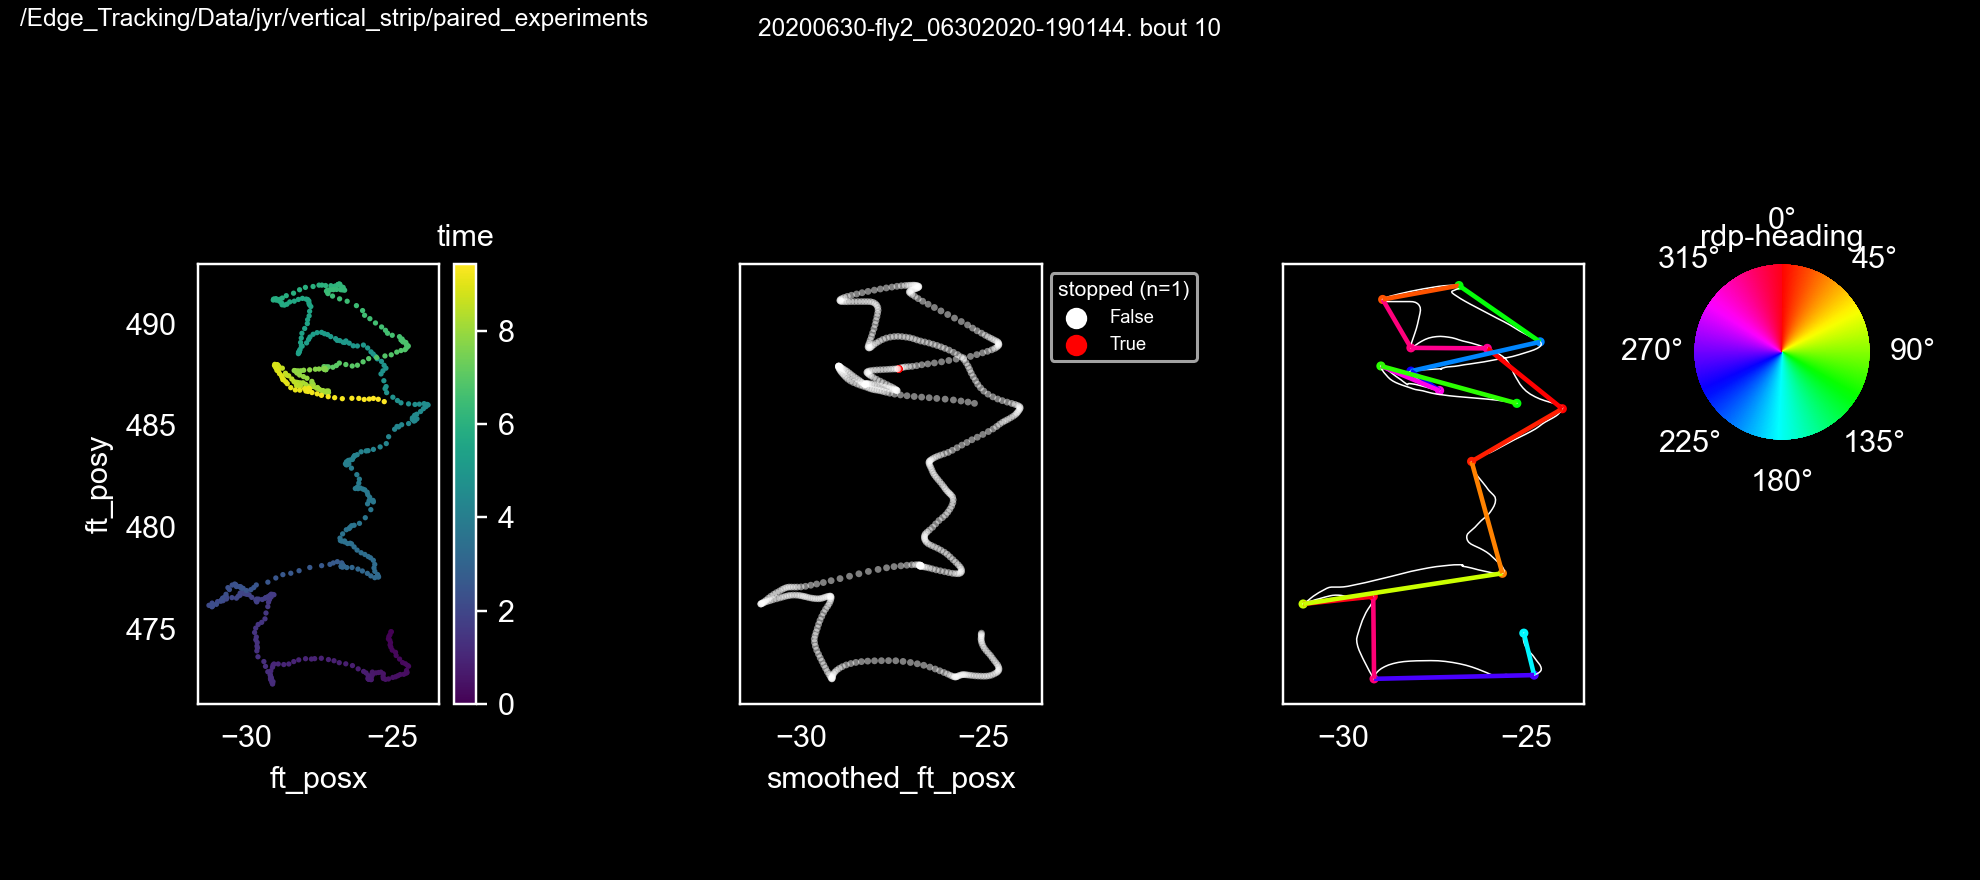

/Users/julianarhee/Documents/rutalab/data/figures/vertical_strip/paired_experiments/stops heading-at-stops_20200630-fly2_06302020-190144_bout10


<IPython.core.display.Javascript object>


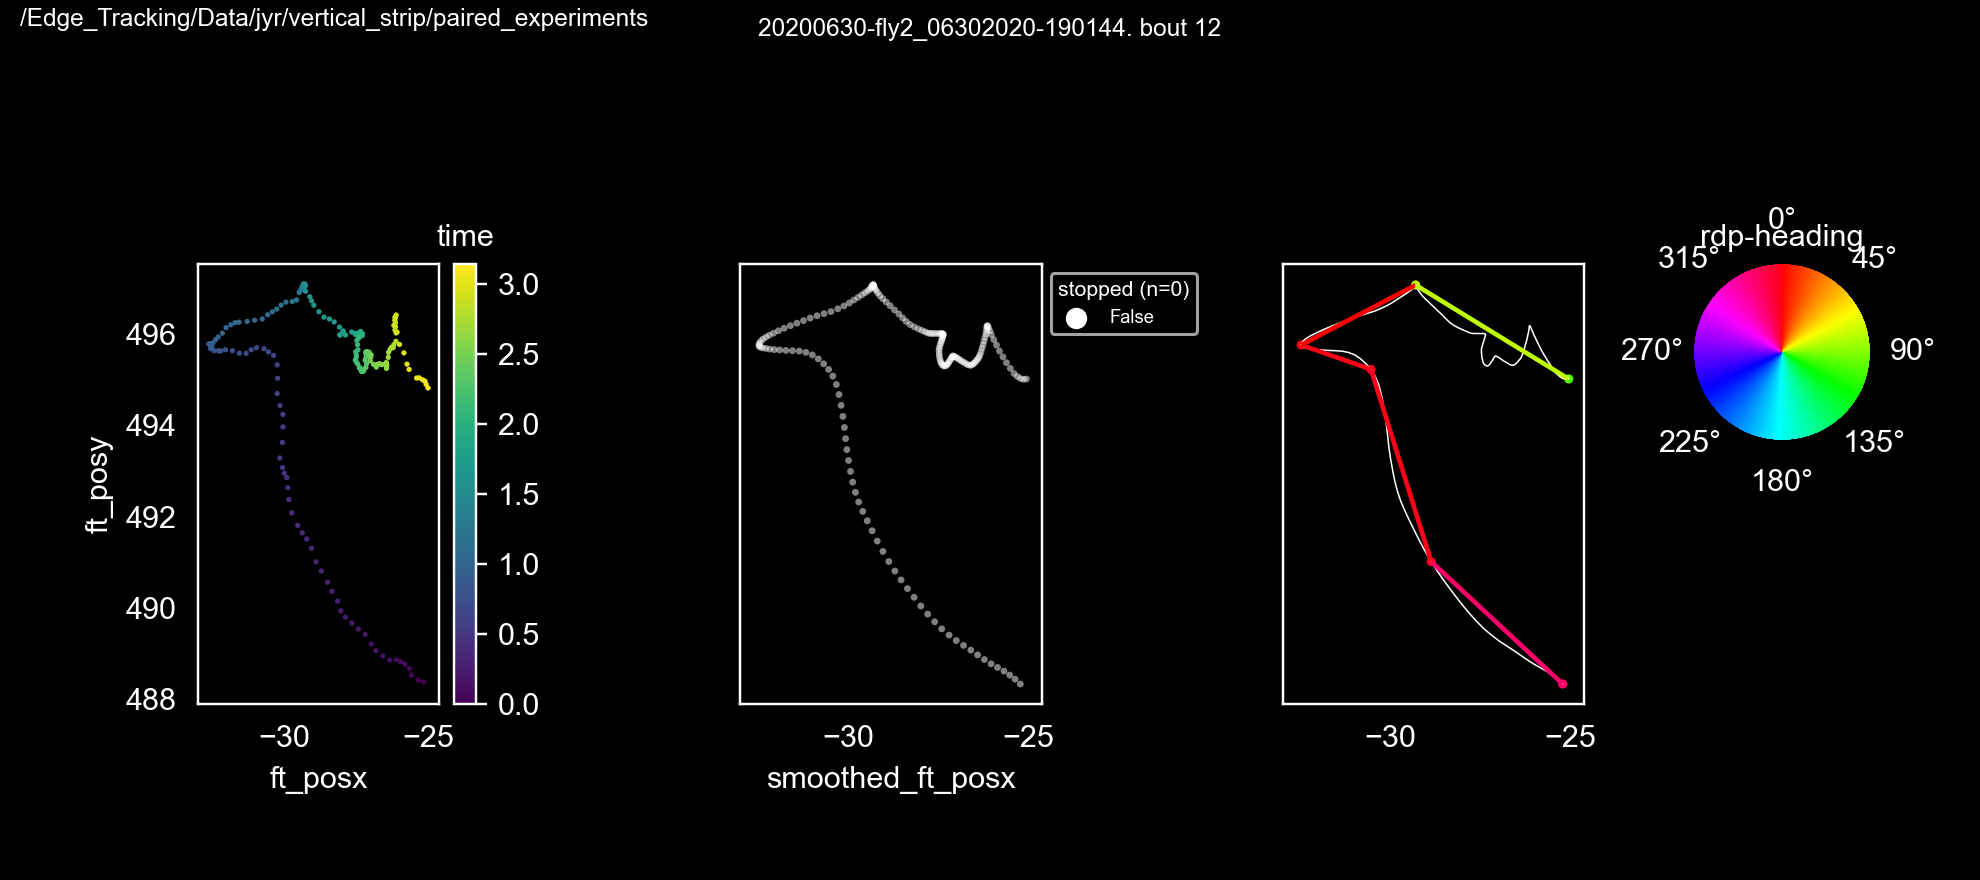

/Users/julianarhee/Documents/rutalab/data/figures/vertical_strip/paired_experiments/stops heading-at-stops_20200630-fly2_06302020-190144_bout12


<IPython.core.display.Javascript object>


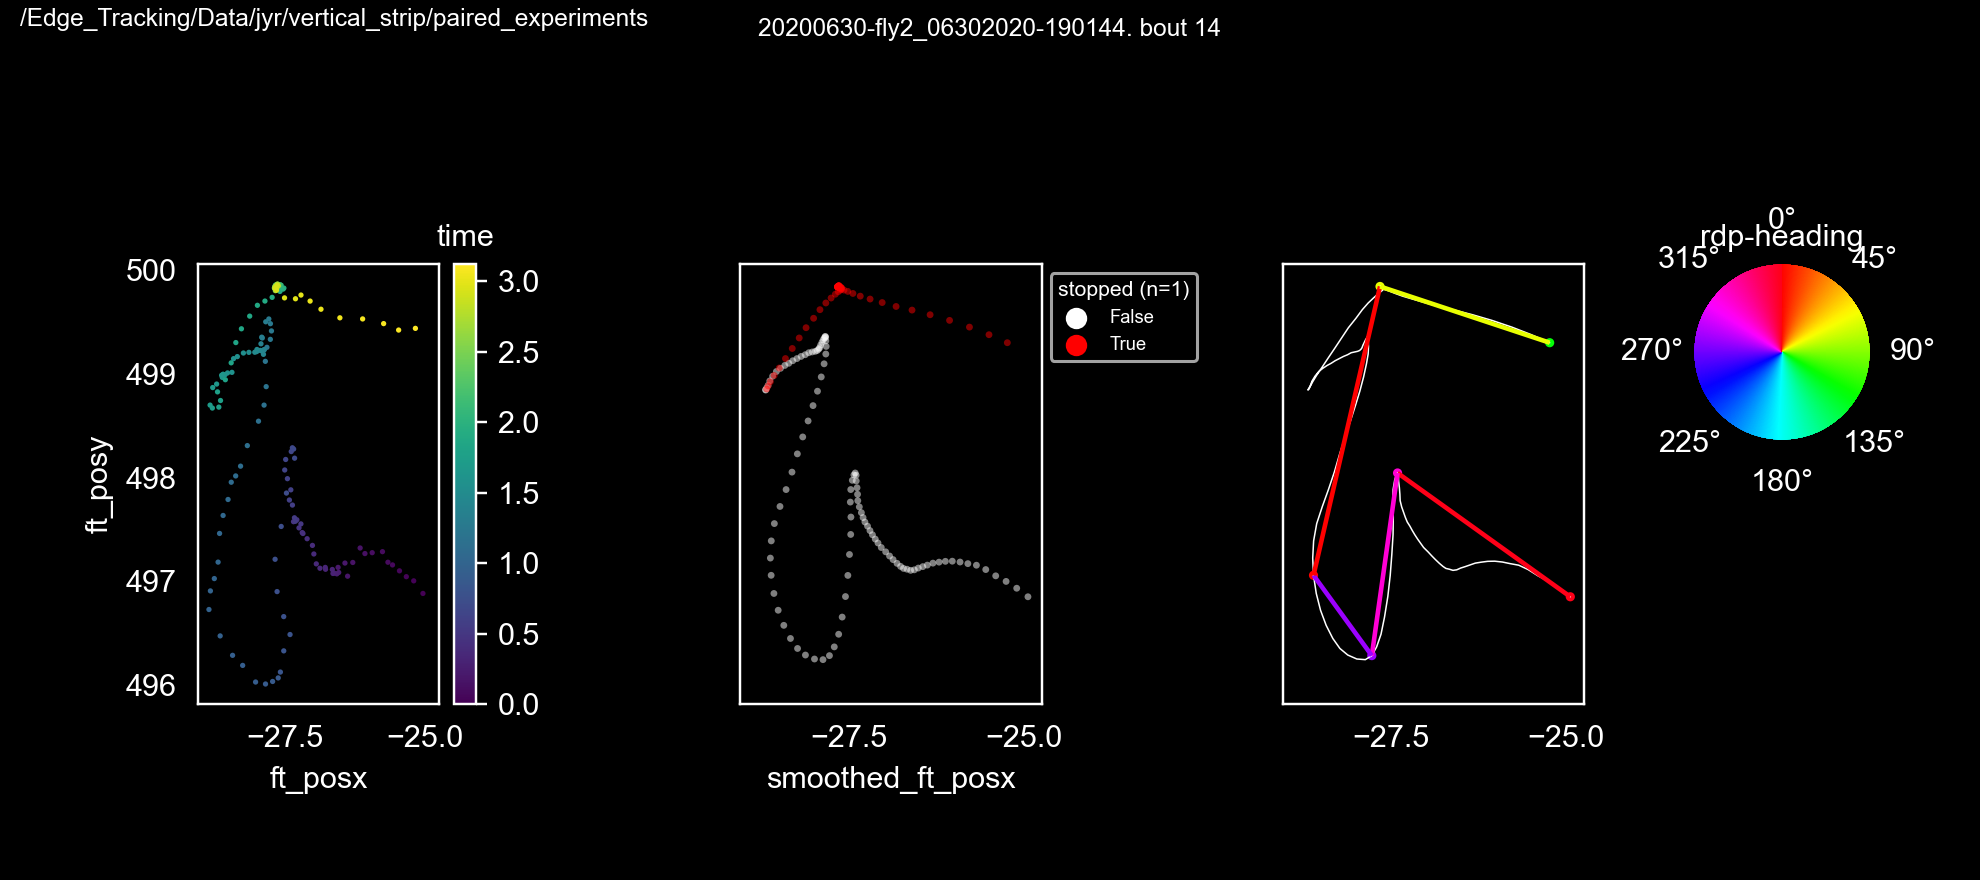

/Users/julianarhee/Documents/rutalab/data/figures/vertical_strip/paired_experiments/stops heading-at-stops_20200630-fly2_06302020-190144_bout14


<IPython.core.display.Javascript object>


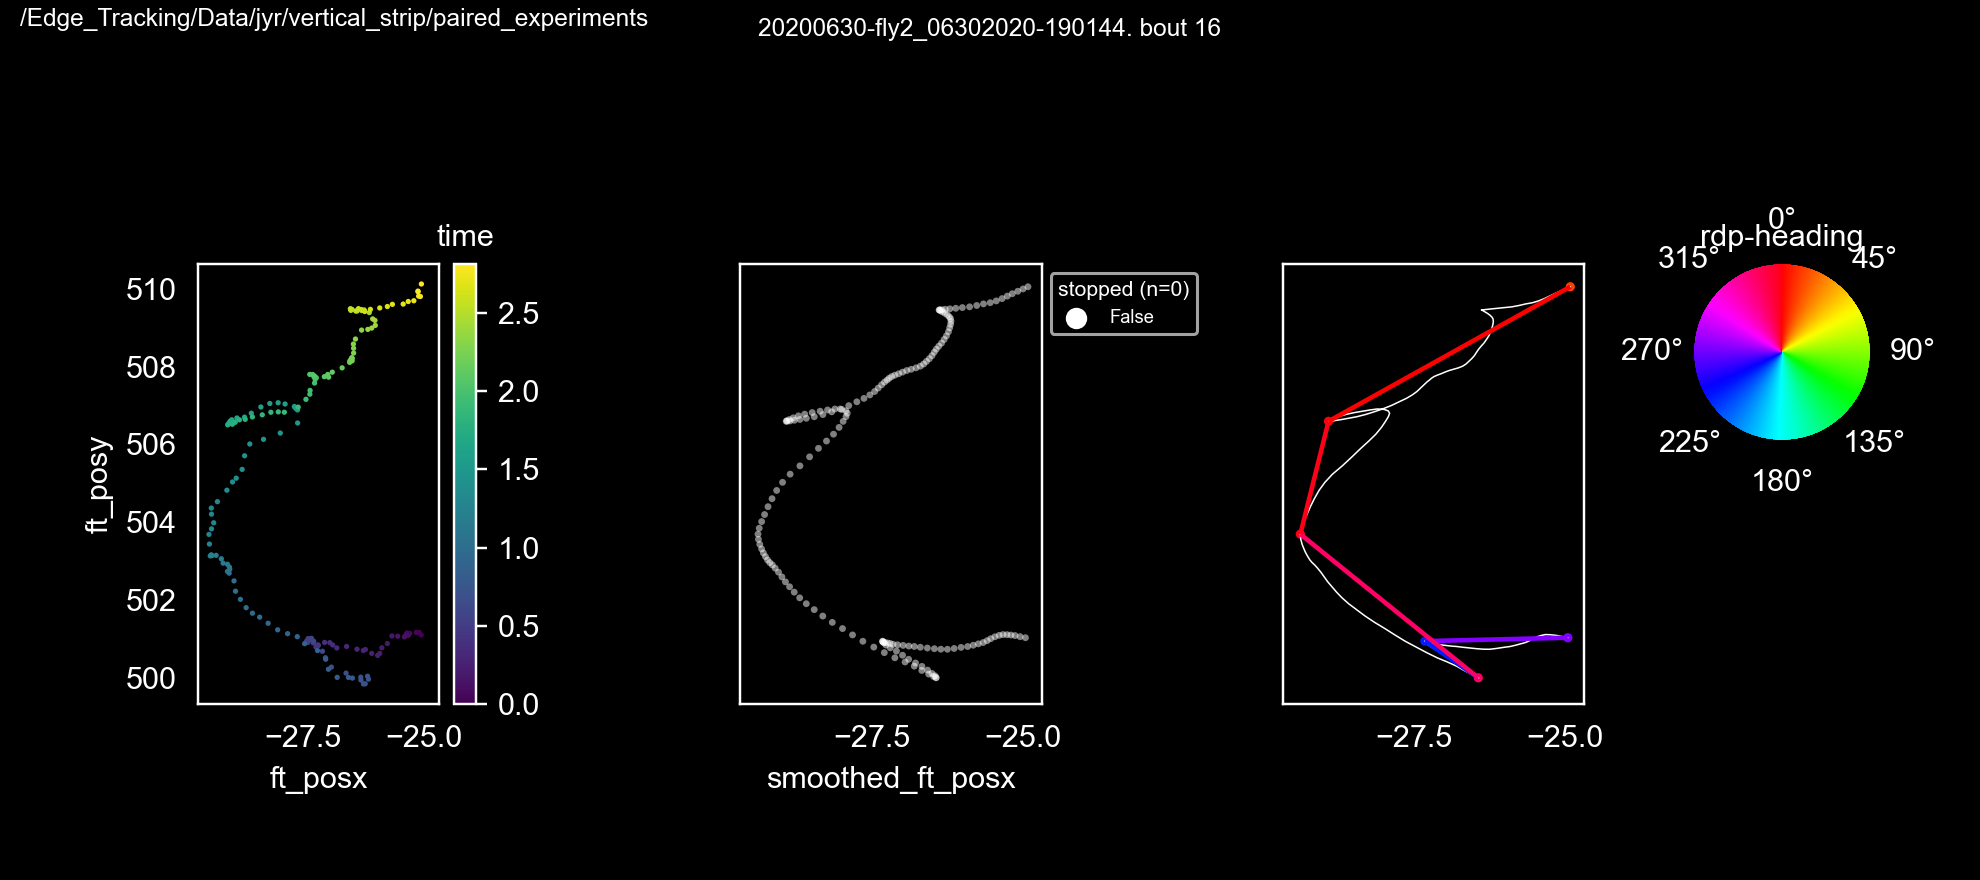

/Users/julianarhee/Documents/rutalab/data/figures/vertical_strip/paired_experiments/stops heading-at-stops_20200630-fly2_06302020-190144_bout16


<IPython.core.display.Javascript object>


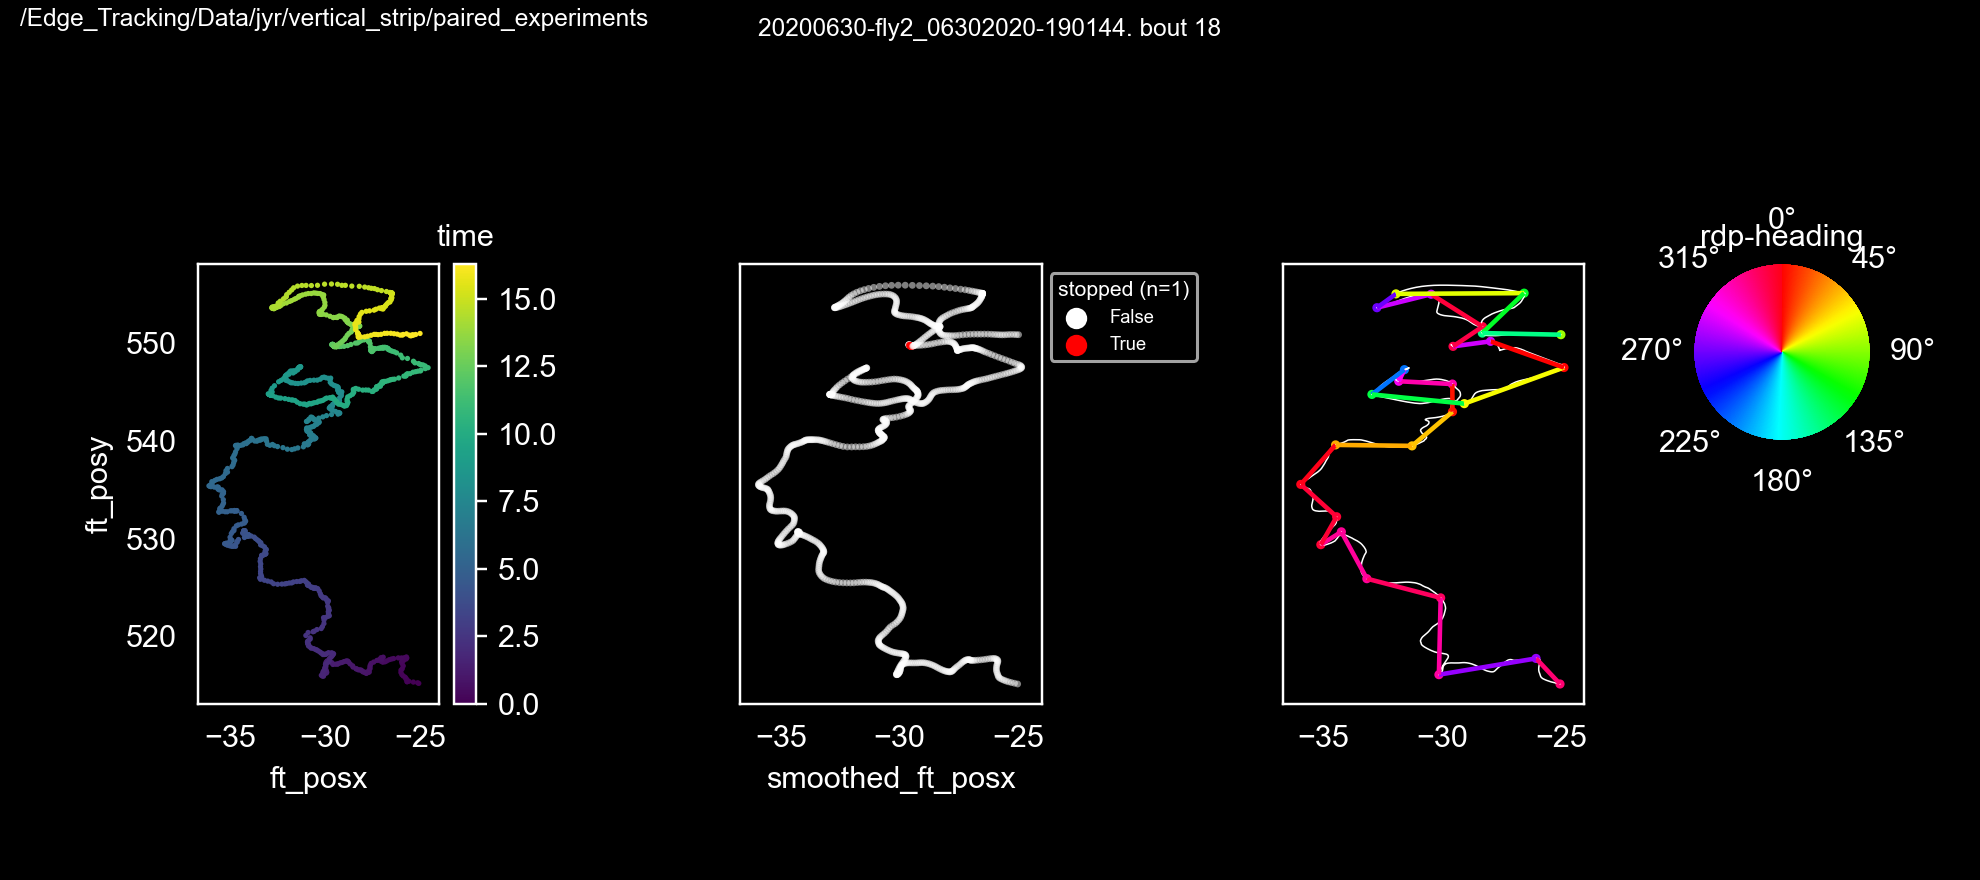

/Users/julianarhee/Documents/rutalab/data/figures/vertical_strip/paired_experiments/stops heading-at-stops_20200630-fly2_06302020-190144_bout18


<IPython.core.display.Javascript object>


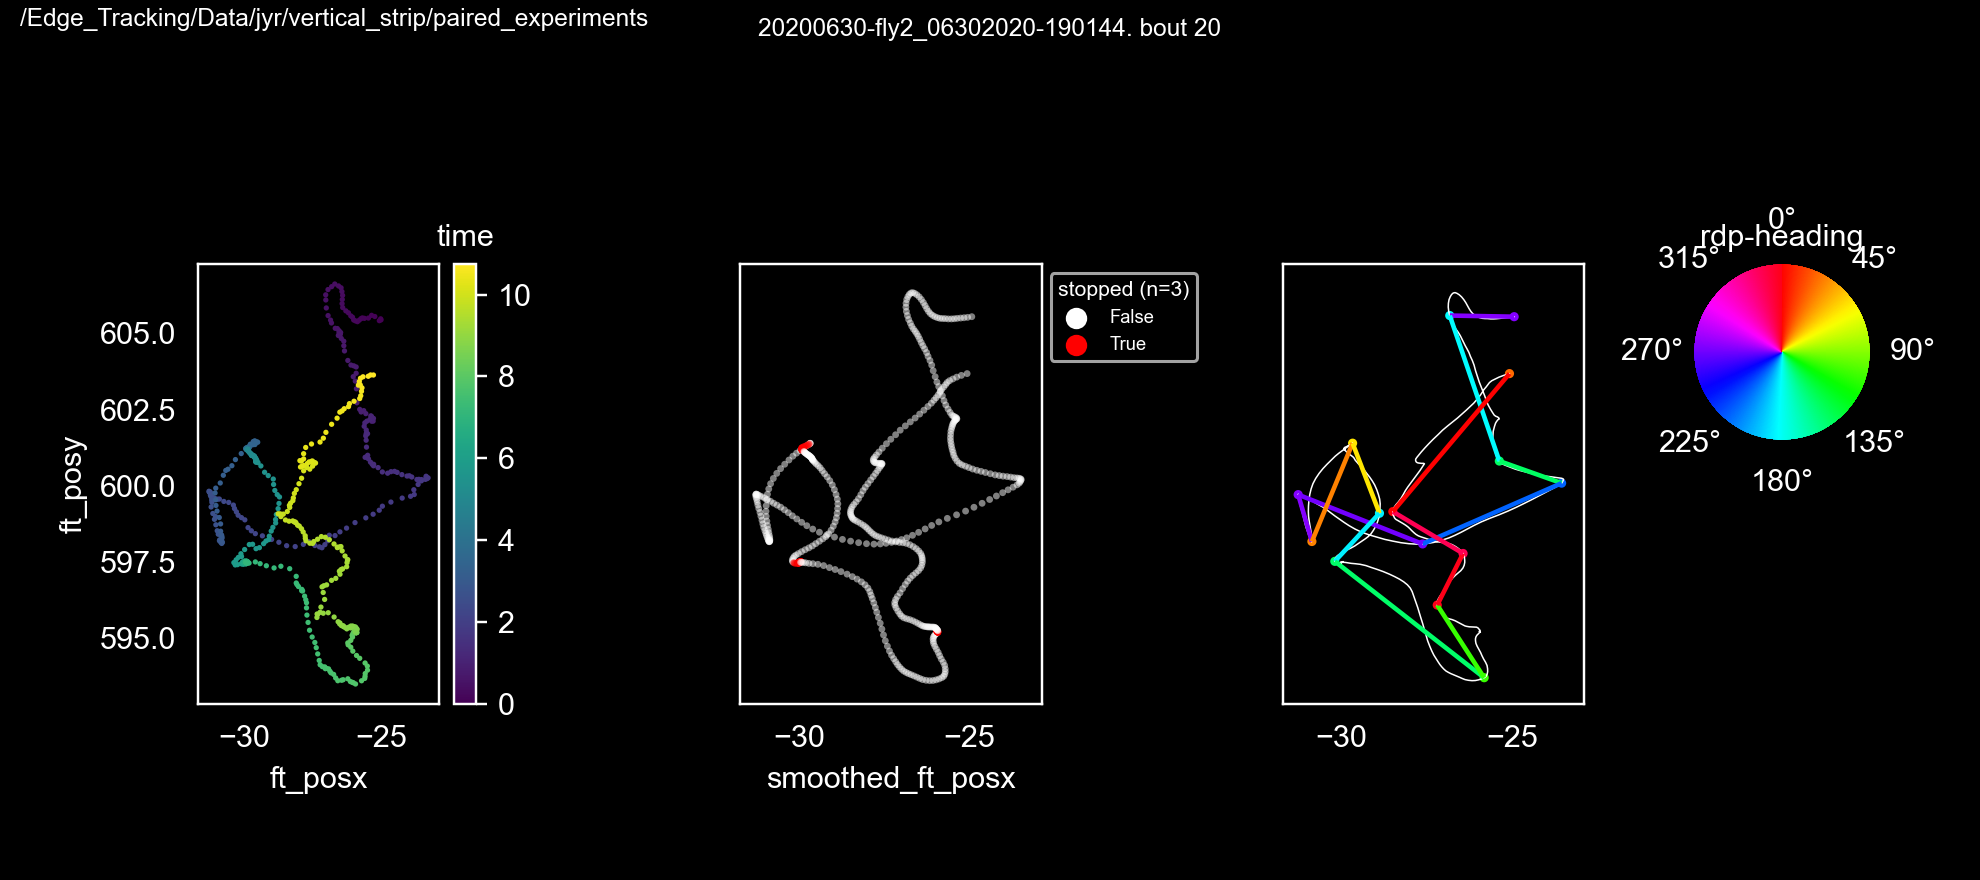

/Users/julianarhee/Documents/rutalab/data/figures/vertical_strip/paired_experiments/stops heading-at-stops_20200630-fly2_06302020-190144_bout20


<IPython.core.display.Javascript object>


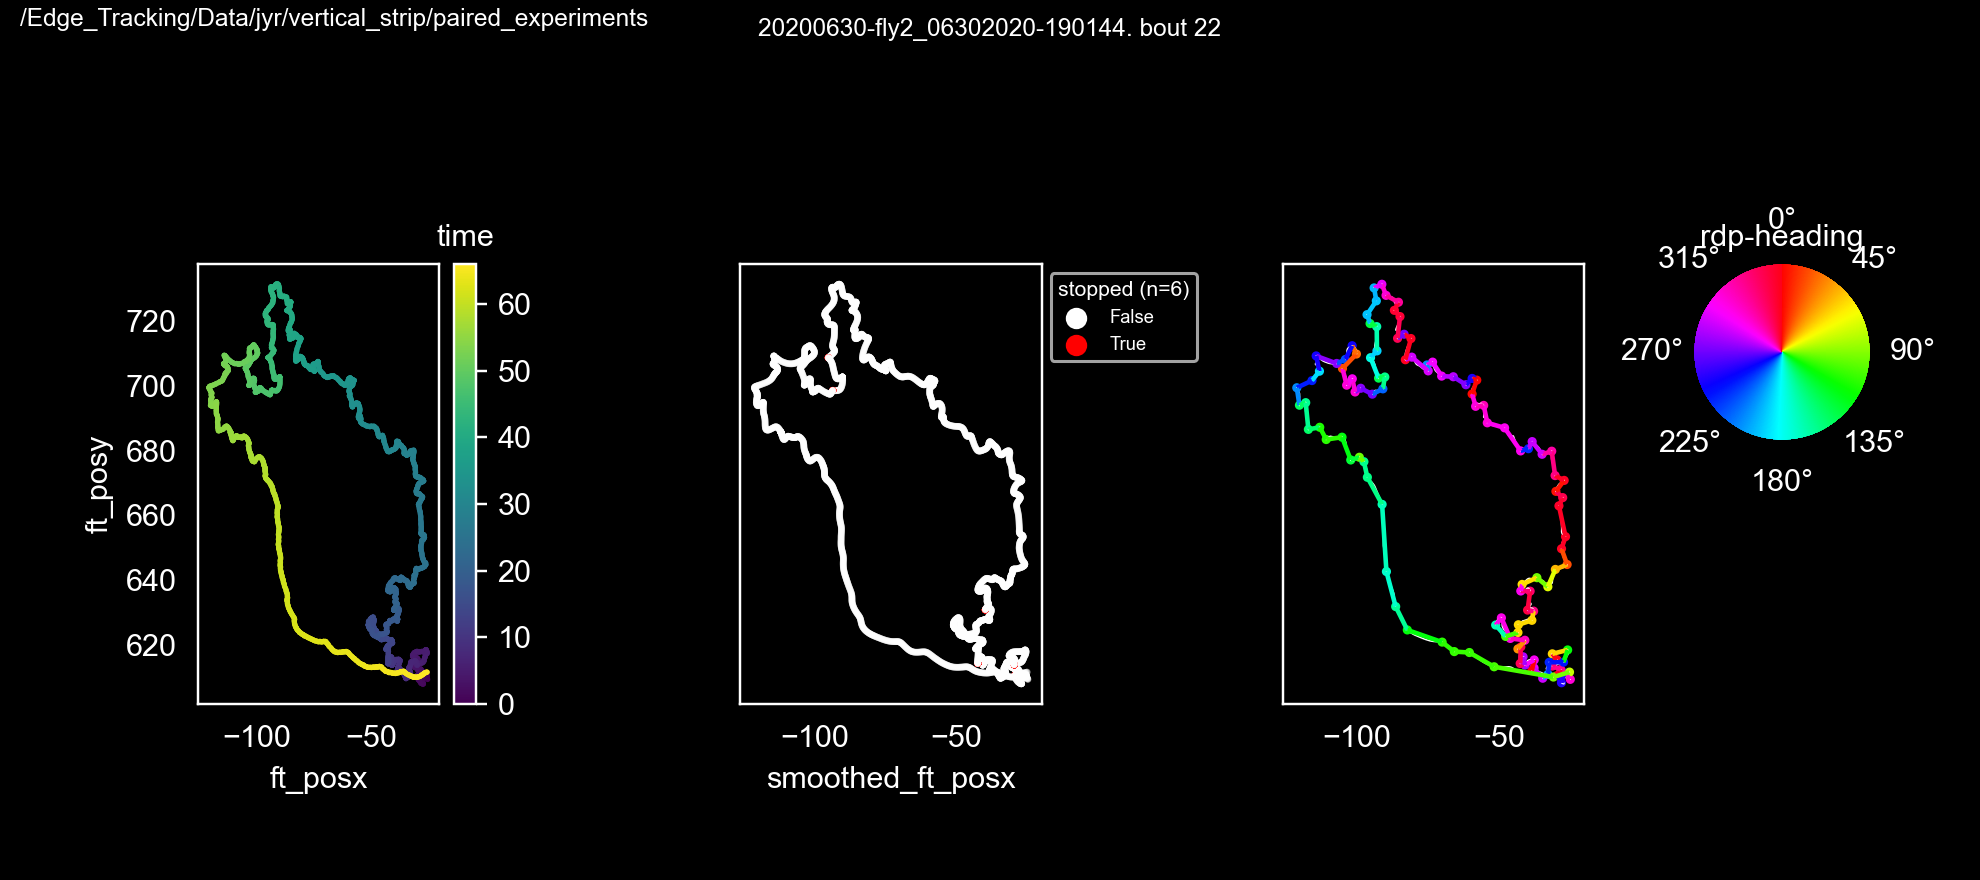

/Users/julianarhee/Documents/rutalab/data/figures/vertical_strip/paired_experiments/stops heading-at-stops_20200630-fly2_06302020-190144_bout22


<IPython.core.display.Javascript object>


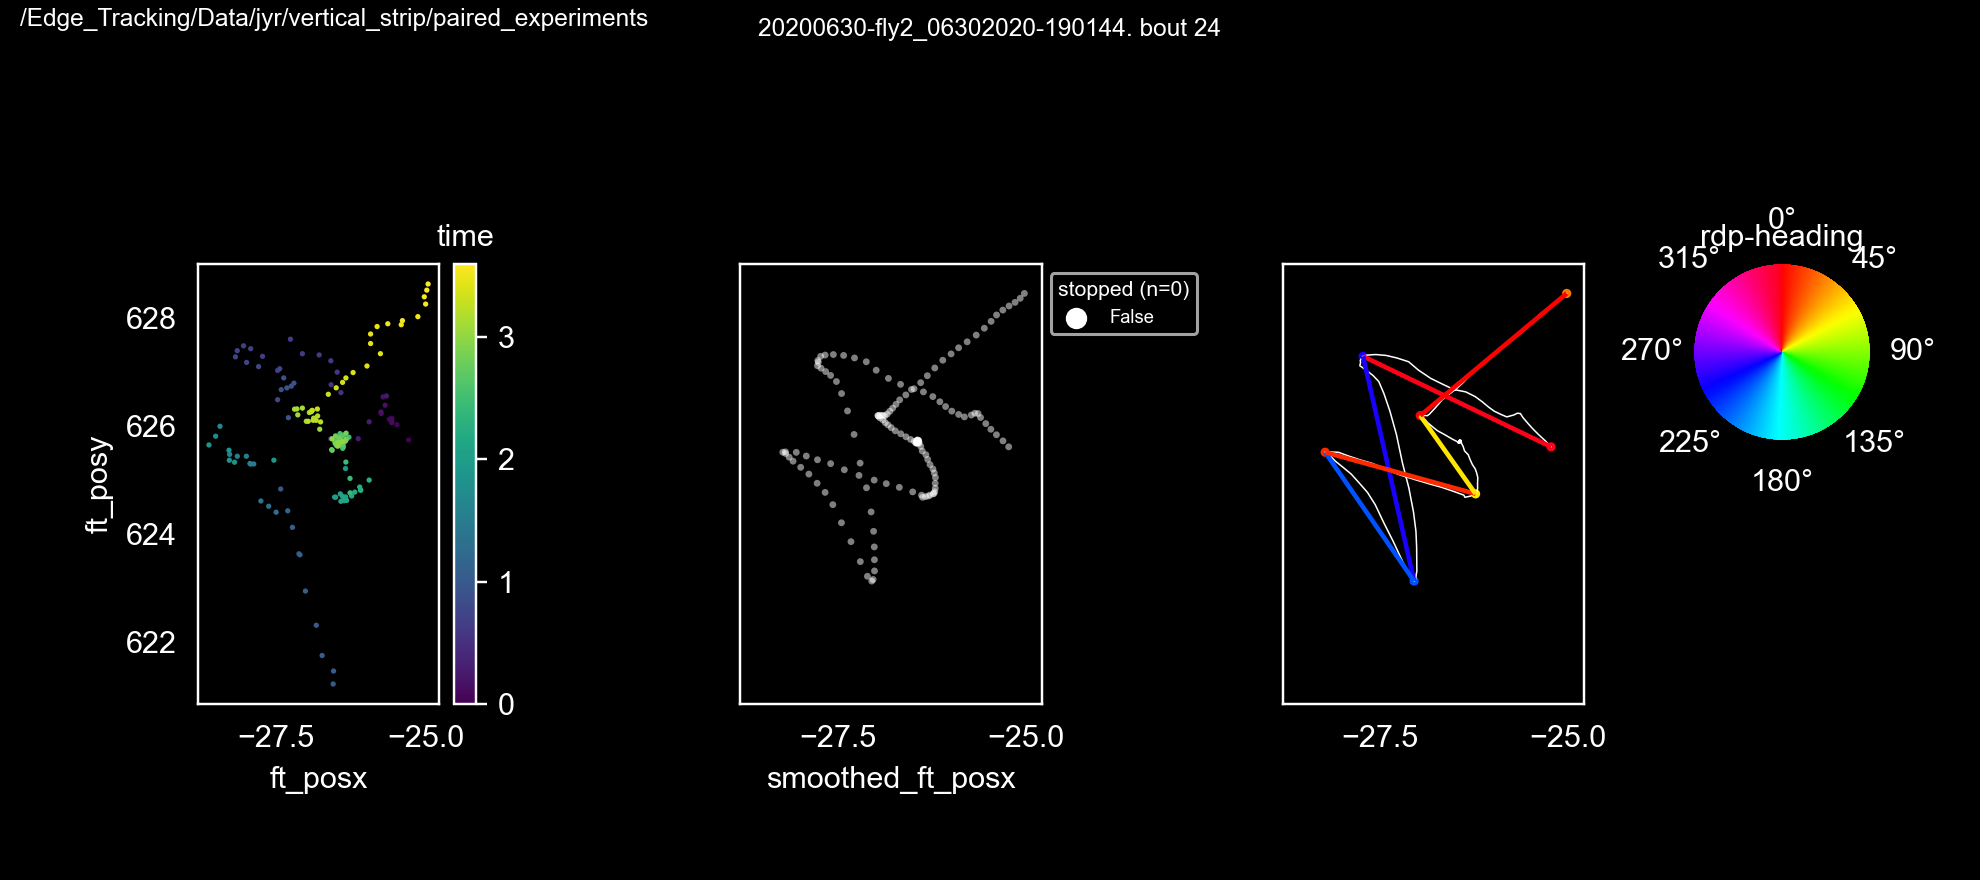

/Users/julianarhee/Documents/rutalab/data/figures/vertical_strip/paired_experiments/stops heading-at-stops_20200630-fly2_06302020-190144_bout24


In [382]:
for bnum in plot_bouts:
    b_ = boutdf[boutdf['boutnum']==bnum].copy()
    b_ = butil.calculate_speed(b_, xvar='smoothed_ft_posx', yvar='smoothed_ft_posy')
    b_ = butil.calculate_stops(b_, stop_thresh=1.0, speed_varname='speed')
    b_ = butil.parse_bouts(b_, count_varname='stopped', bout_varname='stopboutnum')
# b_[b_['stopped']]['stopboutnum'].unique()
    b_ = butil.filter_bouts_by_dur(b_, bout_thresh=stopdur_thresh, \
                               count_varname='stopped', bout_varname='stopboutnum')
    fig = butil.examine_heading_at_stops(b_, xvar=xvar, yvar=yvar)
    fig.suptitle('{}. bout {}'.format(trial_id, bnum), fontsize=8)
    util.label_figure(fig, fig_id)

    figname = 'heading-at-stops_{}_bout{}'.format(trial_id, bnum)
    pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))
    print(curr_savedir, figname)

In [449]:
# def get_speed_and_stops(b_, speed_thresh=1.0, stopdur_thresh=0.5):
#     b_ = butil.calculate_speed(b_, xvar='smoothed_ft_posx', yvar='smoothed_ft_posy')
#     b_ = butil.calculate_stops(b_, stop_thresh=speed_thresh, speed_varname='speed')
#     b_ = butil.parse_bouts(b_, count_varname='stopped', bout_varname='stopboutnum')
# # b_[b_['stopped']]['stopboutnum'].unique()
#     b_ = butil.filter_bouts_by_dur(b_, bout_thresh=stopdur_thresh, \
#                                count_varname='stopped', bout_varname='stopboutnum')
#     return b_

In [509]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [510]:
bnum = 2
b_ = df[df['boutnum']==bnum].copy()

In [511]:
df = butil.get_speed_and_stops(df, speed_thresh=1.0, stopdur_thresh=0.5)

<IPython.core.display.Javascript object>


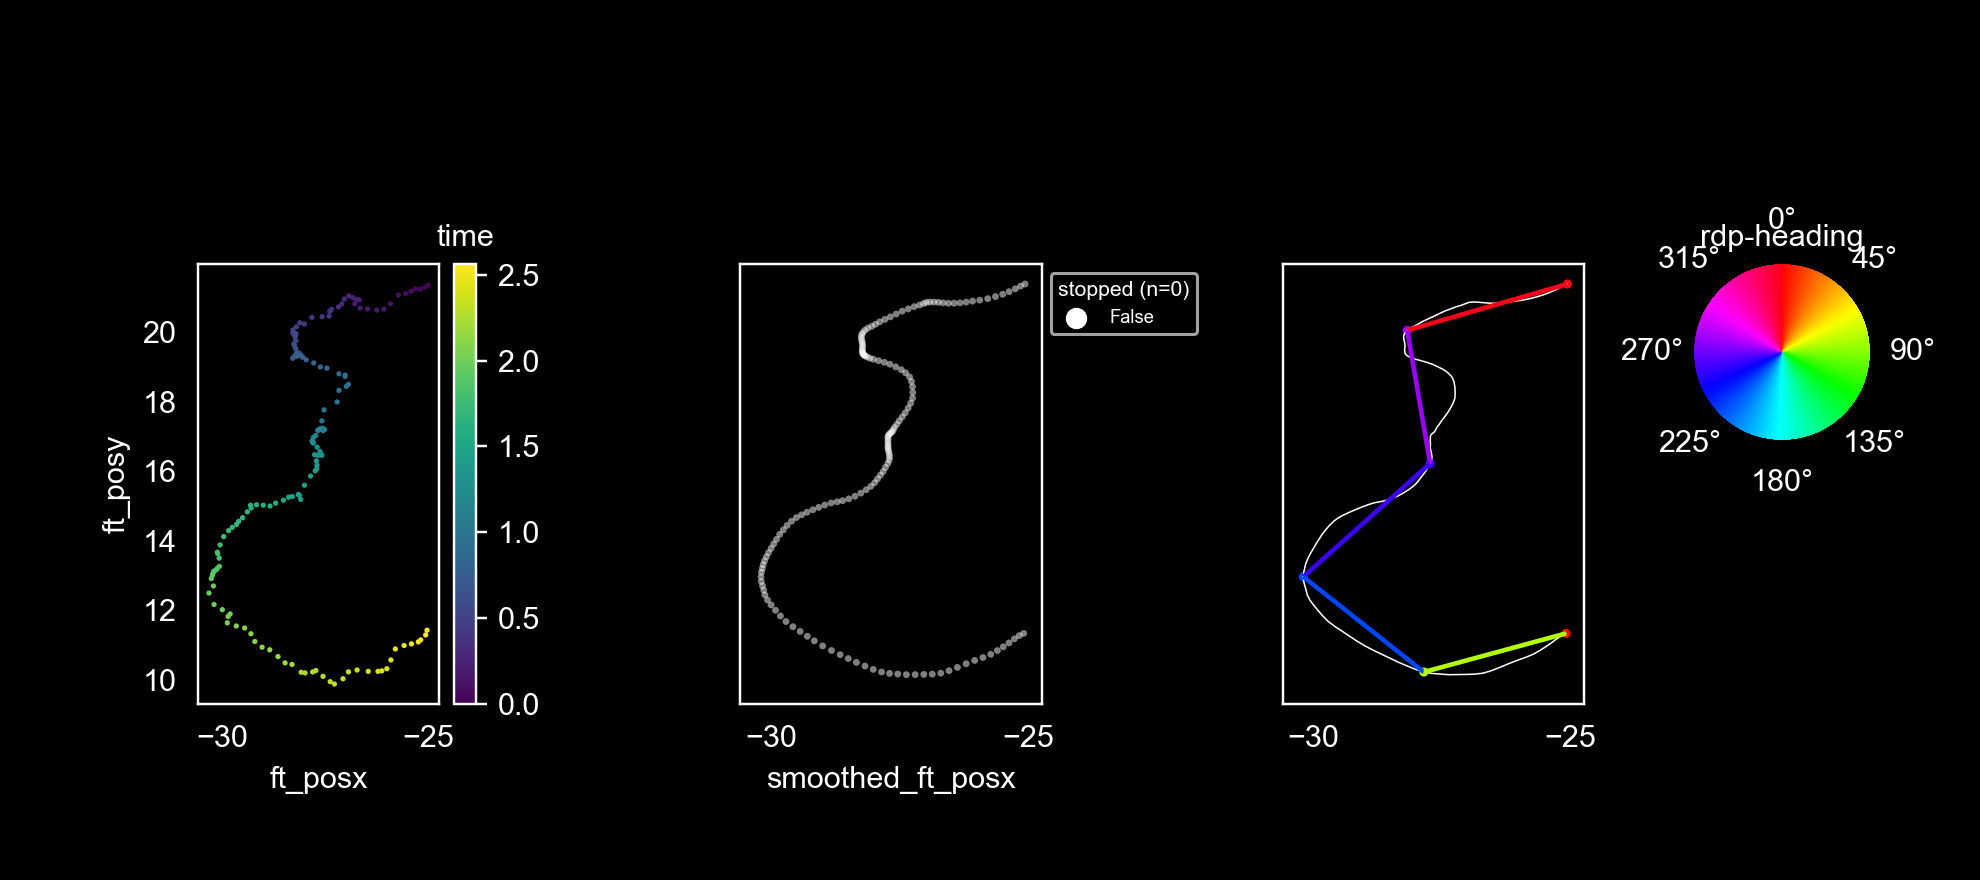

In [512]:
fig = butil.examine_heading_at_stops(b_, xvar=xvar, yvar=yvar)

In [513]:
stopbouts = b_[b_['stopped']]['stopboutnum'].unique()
len(stopbouts)

0

In [453]:
# def mean_dir_after_stop(df, speed_thresh=1.0, stopdur_thresh=0.5):
#     d_list = []
#     i=0
#     for bnum, b_ in df.groupby('boutnum'):
#         # b_ = get_speed_and_stops(b_, speed_thresh=speed_thresh, stopdur_thresh=stopdur_thresh)
#         xwind_dist = b_['crosswind_dist'].sum() - b_['crosswind_dist'].iloc[0]
#         stopbouts = b_[b_['stopped']]['stopboutnum'].unique()
#         #print(bnum, len(stopbouts))
#         for snum in stopbouts:
#             if b_[b_['stopboutnum']==(snum+1)].shape[0]==0:
#                 continue
#             d_ = pd.DataFrame({
#                 'fly_id': b_['fly_id'].unique()[0],
#                 'trial_id': b_['trial_id'].unique()[0],
#                 'condition': b_['condition'].unique()[0],
#                 'boutnum': bnum,
#                 'crosswind_dist': xwind_dist,
#                 'stopboutnum': snum,
#                 'meandir': np.rad2deg(sts.circmean(b_[b_['stopboutnum']==(snum+1)]['ft_heading']))},
#                 index=[i]
#             )
#             i+=1
#             d_list.append(d_)
#     meandirs = pd.concat(d_list)
#     return meandirs

In [514]:
meandirs = butil.mean_dir_after_stop(df, speed_thresh=1.0, stopdur_thresh=0.5)

<IPython.core.display.Javascript object>


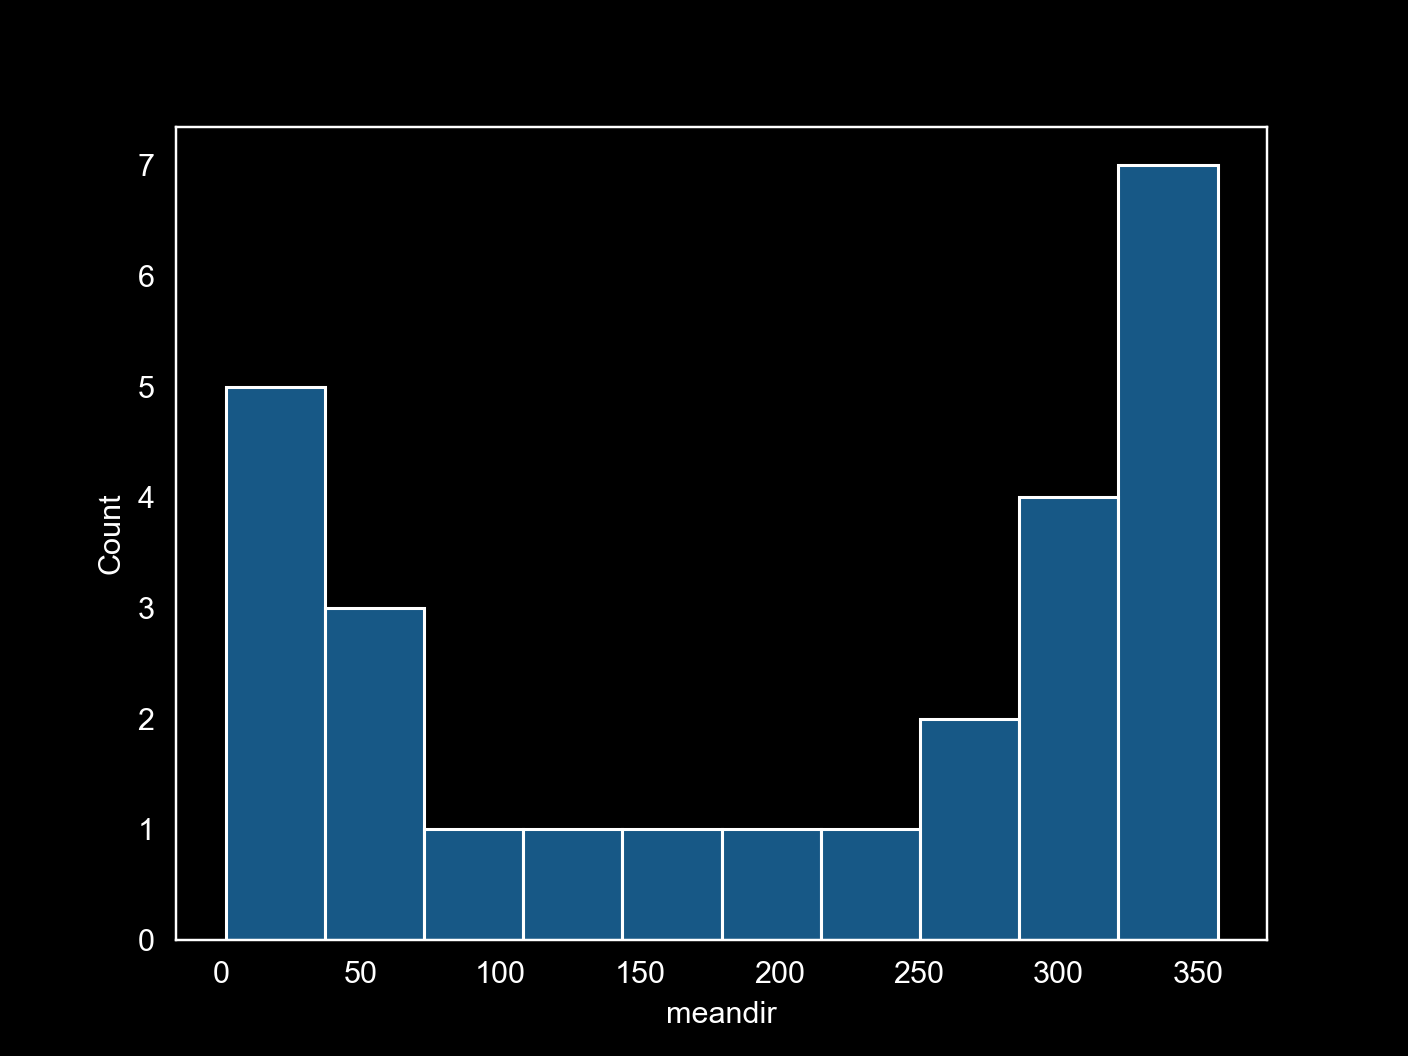

<AxesSubplot: xlabel='meandir', ylabel='Count'>

In [515]:
#fig, ax = pl.subplots(subplot_kw={'projection': 'polar'})
fig, ax = pl.subplots()
sns.histplot(data=meandirs, x='meandir', ax=ax, bins=10)

In [524]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [526]:
# fly_id = '20200630-fly2' #'20220530-fly0'
#currcond='reinforced'
#currdf = df0[(df0['condition']==currcond)].copy()
# 
smooth = True
xvar='smoothed_ft_posx' if smooth else 'ft_posx'
yvar='smoothed_ft_posy' if smooth else 'ft_posy'
smooth_window=11
rdp_epsilon=1 #0.5 # distance unit (usually, 1mm)
speed_thresh=1.0
stopdur_thresh=0.5
# ----------------------------------------------------
d_list=[]
for trial_id, df1 in df0.groupby('trial_id'):
    trial_id = df1['trial_id'].unique()[0]
    oparams = butil.get_odor_params(df1) #[df1['condition']==cond])
    df = df1[df1['time']>=oparams['odor_start_time']].copy()
    # process df
    df = butil.smooth_traces(df, window_size=smooth_window, return_same=True)
    df = butil.add_rdp_by_bout(df, epsilon=rdp_epsilon, xvar=xvar, yvar=yvar)
    # get mean dur after stops
    df = butil.get_speed_and_stops(df, speed_thresh=speed_thresh, stopdur_thresh=stopdur_thresh)
    meandirs = butil.mean_dir_after_stop(df, speed_thresh=1.0, stopdur_thresh=0.5)
    d_list.append(meandirs)

(20801, 37)


/Users/julianarhee/Repositories/plume-tracking/behavior.py:991: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(xvar)] = simp[:, 0]
/Users/julianarhee/Repositories/plume-tracking/behavior.py:992: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(yvar)] = simp[:, 1]


(25717, 37)


/Users/julianarhee/Repositories/plume-tracking/behavior.py:991: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(xvar)] = simp[:, 0]
/Users/julianarhee/Repositories/plume-tracking/behavior.py:992: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(yvar)] = simp[:, 1]


(20110, 37)


/Users/julianarhee/Repositories/plume-tracking/behavior.py:991: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(xvar)] = simp[:, 0]
/Users/julianarhee/Repositories/plume-tracking/behavior.py:992: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(yvar)] = simp[:, 1]


(37226, 37)


/Users/julianarhee/Repositories/plume-tracking/behavior.py:991: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(xvar)] = simp[:, 0]
/Users/julianarhee/Repositories/plume-tracking/behavior.py:992: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(yvar)] = simp[:, 1]


(24155, 37)


/Users/julianarhee/Repositories/plume-tracking/behavior.py:991: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(xvar)] = simp[:, 0]
/Users/julianarhee/Repositories/plume-tracking/behavior.py:992: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(yvar)] = simp[:, 1]


(11470, 37)


/Users/julianarhee/Repositories/plume-tracking/behavior.py:991: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(xvar)] = simp[:, 0]
/Users/julianarhee/Repositories/plume-tracking/behavior.py:992: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(yvar)] = simp[:, 1]


(30489, 37)


/Users/julianarhee/Repositories/plume-tracking/behavior.py:991: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(xvar)] = simp[:, 0]
/Users/julianarhee/Repositories/plume-tracking/behavior.py:992: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(yvar)] = simp[:, 1]


(28184, 37)


/Users/julianarhee/Repositories/plume-tracking/behavior.py:991: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(xvar)] = simp[:, 0]
/Users/julianarhee/Repositories/plume-tracking/behavior.py:992: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(yvar)] = simp[:, 1]


(25916, 37)


/Users/julianarhee/Repositories/plume-tracking/behavior.py:991: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(xvar)] = simp[:, 0]
/Users/julianarhee/Repositories/plume-tracking/behavior.py:992: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(yvar)] = simp[:, 1]


(25504, 37)


/Users/julianarhee/Repositories/plume-tracking/behavior.py:991: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(xvar)] = simp[:, 0]
/Users/julianarhee/Repositories/plume-tracking/behavior.py:992: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(yvar)] = simp[:, 1]


(23231, 37)


/Users/julianarhee/Repositories/plume-tracking/behavior.py:991: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(xvar)] = simp[:, 0]
/Users/julianarhee/Repositories/plume-tracking/behavior.py:992: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(yvar)] = simp[:, 1]


(40663, 37)


/Users/julianarhee/Repositories/plume-tracking/behavior.py:991: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(xvar)] = simp[:, 0]
/Users/julianarhee/Repositories/plume-tracking/behavior.py:992: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(yvar)] = simp[:, 1]


(23388, 37)


/Users/julianarhee/Repositories/plume-tracking/behavior.py:991: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(xvar)] = simp[:, 0]
/Users/julianarhee/Repositories/plume-tracking/behavior.py:992: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(yvar)] = simp[:, 1]


(26686, 37)


/Users/julianarhee/Repositories/plume-tracking/behavior.py:991: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(xvar)] = simp[:, 0]
/Users/julianarhee/Repositories/plume-tracking/behavior.py:992: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_.loc[b_.index, 'rdp_{}'.format(yvar)] = simp[:, 1]


In [527]:
mdf = pd.concat(d_list).reset_index(drop=True)
mdf

fly_id                       trial_id   condition  boutnum  \
0    20200630-fly1  20200630-fly1_06302020-162733         air        1   
1    20200630-fly1  20200630-fly1_06302020-162733         air        1   
2    20200630-fly1  20200630-fly1_06302020-162733         air        1   
3    20200630-fly1  20200630-fly1_06302020-162733         air        1   
4    20200630-fly1  20200630-fly1_06302020-162733         air        1   
..             ...                            ...         ...      ...   
966  20200720-fly9  20200720-fly9_07202020-195455  reinforced       12   
967  20200720-fly9  20200720-fly9_07202020-195455  reinforced       12   
968  20200720-fly9  20200720-fly9_07202020-195455  reinforced       12   
969  20200720-fly9  20200720-fly9_07202020-195455  reinforced       12   
970  20200720-fly9  20200720-fly9_07202020-195455  reinforced       12   

     crosswind_dist  stopboutnum     meandir  
0               NaN            2  304.406602  
1               NaN            4   26.086310  
2               NaN            6   28.435812  
3               NaN            8   17.805304  
4               NaN           10    0.013903  
..              ...          ...         ...  
966      983.261693           44   68.601622  
967      983.261693           46  276.996569  
968      983.261693           48   87.502336  
969      983.261693           50  338.280724  
970      983.261693           52  299.883583  

[971 rows x 7 columns]

<IPython.core.display.Javascript object>


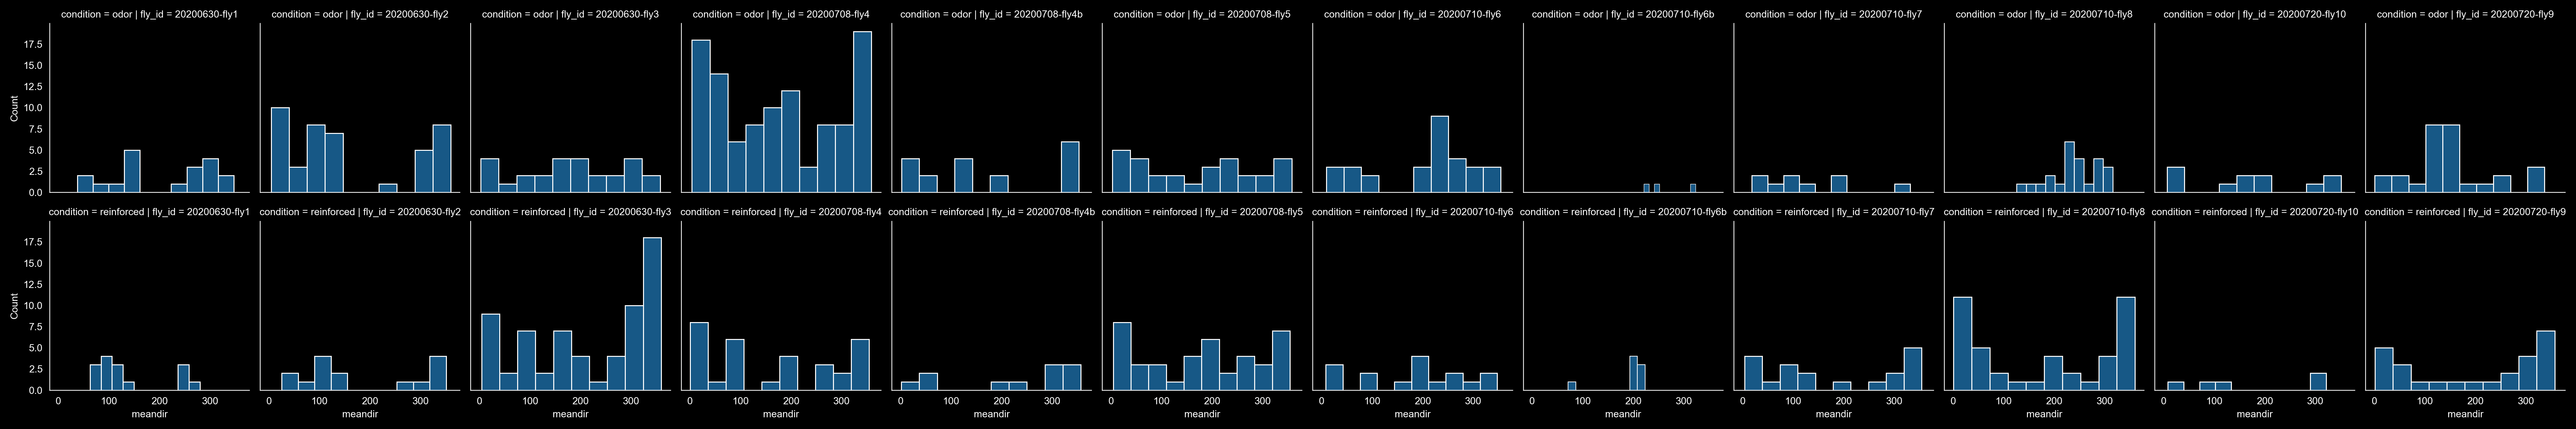

In [529]:
g = sns.FacetGrid(data=mdf[mdf['condition'].isin(['odor', 'reinforced'])], col='fly_id', 
                  row='condition') #col_wrap=3)
g.map_dataframe(sns.histplot, x='meandir', bins=10)
# sns.histplot(data=meandirs, x='meandir', ax=ax, bins=10)

In [502]:
def circular_hist(ax, x, bins=16, density=True, offset=0, gaps=True, facecolor=[0.7]*3):
    """
    Produce a circular histogram of angles on ax.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    x : array
        Angles to plot, expected in units of radians.

    bins : int, optional
        Defines the number of equal-width bins in the range. The default is 16.

    density : bool, optional
        If True plot frequency proportional to area. If False plot frequency
        proportional to radius. The default is True.

    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is 0.

    gaps : bool, optional
        Whether to allow gaps between bins. When gaps = False the bins are
        forced to partition the entire [-pi, pi] range. The default is True.

    Returns
    -------
    n : array or list of arrays
        The number of values in each bin.

    bins : array
        The edges of the bins.

    patches : `.BarContainer` or list of a single `.Polygon`
        Container of individual artists used to create the histogram
        or list of such containers if there are multiple input datasets.
    """
    # Wrap angles to [-pi, pi)
    # x = (x+np.pi) % (2*np.pi) - np.pi
    # Force bins to partition entire circle
    if not gaps:
        #bins = np.linspace(-np.pi, np.pi, num=bins+1)
        bins = np.linspace(0, 2*np.pi, num=bins+1)
    # Bin data and record counts
    n, bins = np.histogram(x, bins=bins)
    # Compute width of each bin
    widths = np.diff(bins)
    # By default plot frequency proportional to area
    if density:
        # Area to assign each bin
        area = n / x.size
        # Calculate corresponding bin radius
        radius = (area/np.pi) ** .5
    # Otherwise plot frequency proportional to radius
    else:
        radius = n
    # Plot data on ax
    patches = ax.bar(bins[:-1], radius, zorder=1, width=widths, #align='edge', 
                     edgecolor='w', fill=True, linewidth=0.5, facecolor=facecolor,
                    alpha=0.5)
    # Set the direction of the zero angle
    ax.set_theta_offset(offset)
    # Remove ylabels for area plots (they are mostly obstructive)
    if density:
        ax.set_yticks([])

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)  # theta increasing clockwise
    
    return n, bins, patches

In [503]:
mdf

fly_id                       trial_id   condition  boutnum  \
0    20200630-fly1  20200630-fly1_06302020-170009  reinforced        2   
1    20200630-fly1  20200630-fly1_06302020-170009  reinforced        4   
2    20200630-fly1  20200630-fly1_06302020-170009  reinforced        4   
3    20200630-fly1  20200630-fly1_06302020-170009  reinforced        4   
4    20200630-fly1  20200630-fly1_06302020-170009  reinforced        6   
..             ...                            ...         ...      ...   
288  20200720-fly9  20200720-fly9_07202020-195455  reinforced       12   
289  20200720-fly9  20200720-fly9_07202020-195455  reinforced       12   
290  20200720-fly9  20200720-fly9_07202020-195455  reinforced       12   
291  20200720-fly9  20200720-fly9_07202020-195455  reinforced       12   
292  20200720-fly9  20200720-fly9_07202020-195455  reinforced       12   

     crosswind_dist  stopboutnum     meandir  
0         71.409928            2  280.219811  
1        272.791748            4  105.291533  
2        272.791748            6   82.881099  
3        272.791748            8  110.754613  
4       2256.783086           10   62.440408  
..              ...          ...         ...  
288      983.261693           44   68.601622  
289      983.261693           46  276.996569  
290      983.261693           48   87.502336  
291      983.261693           50  338.280724  
292      983.261693           52  299.883583  

[293 rows x 7 columns]

<IPython.core.display.Javascript object>


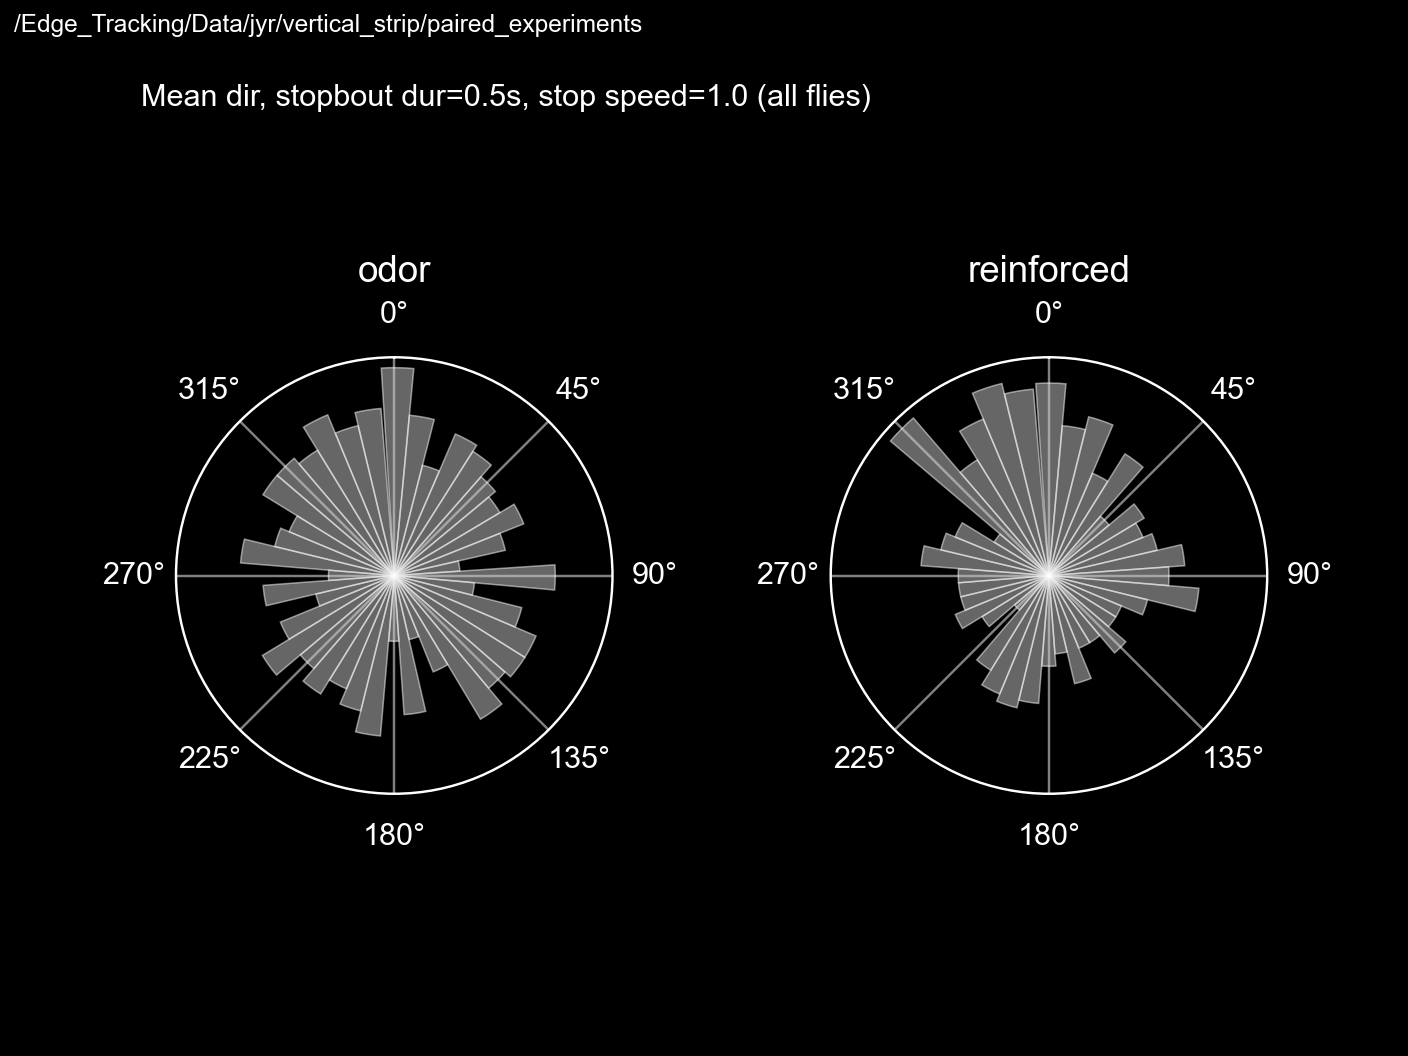

In [573]:
# Construct figure and axis to plot on
fig, axn = pl.subplots(1, 2, subplot_kw=dict(projection='polar'))

# Visualise by area of bins
#ax=axn[0]
for ax, cond in zip(axn, ['odor', 'reinforced']):
    circular_hist(ax, np.deg2rad(mdf[mdf['condition']==cond]['meandir']), bins=40, 
                  facecolor=[0.8]*3)
    ax.set_title(cond)
pl.subplots_adjust(wspace=0.5, top=0.8)

title = 'Mean dir, stopbout dur={:.1f}s, stop speed={:.1f} (all flies)'\
            .format(stopdur_thresh, speed_thresh)
fig.text(0.1, 0.9, title)

util.label_figure(fig, fig_id)

figname = 'meandir_after_stop_outbouts_all-flies_polar'
pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))

<IPython.core.display.Javascript object>


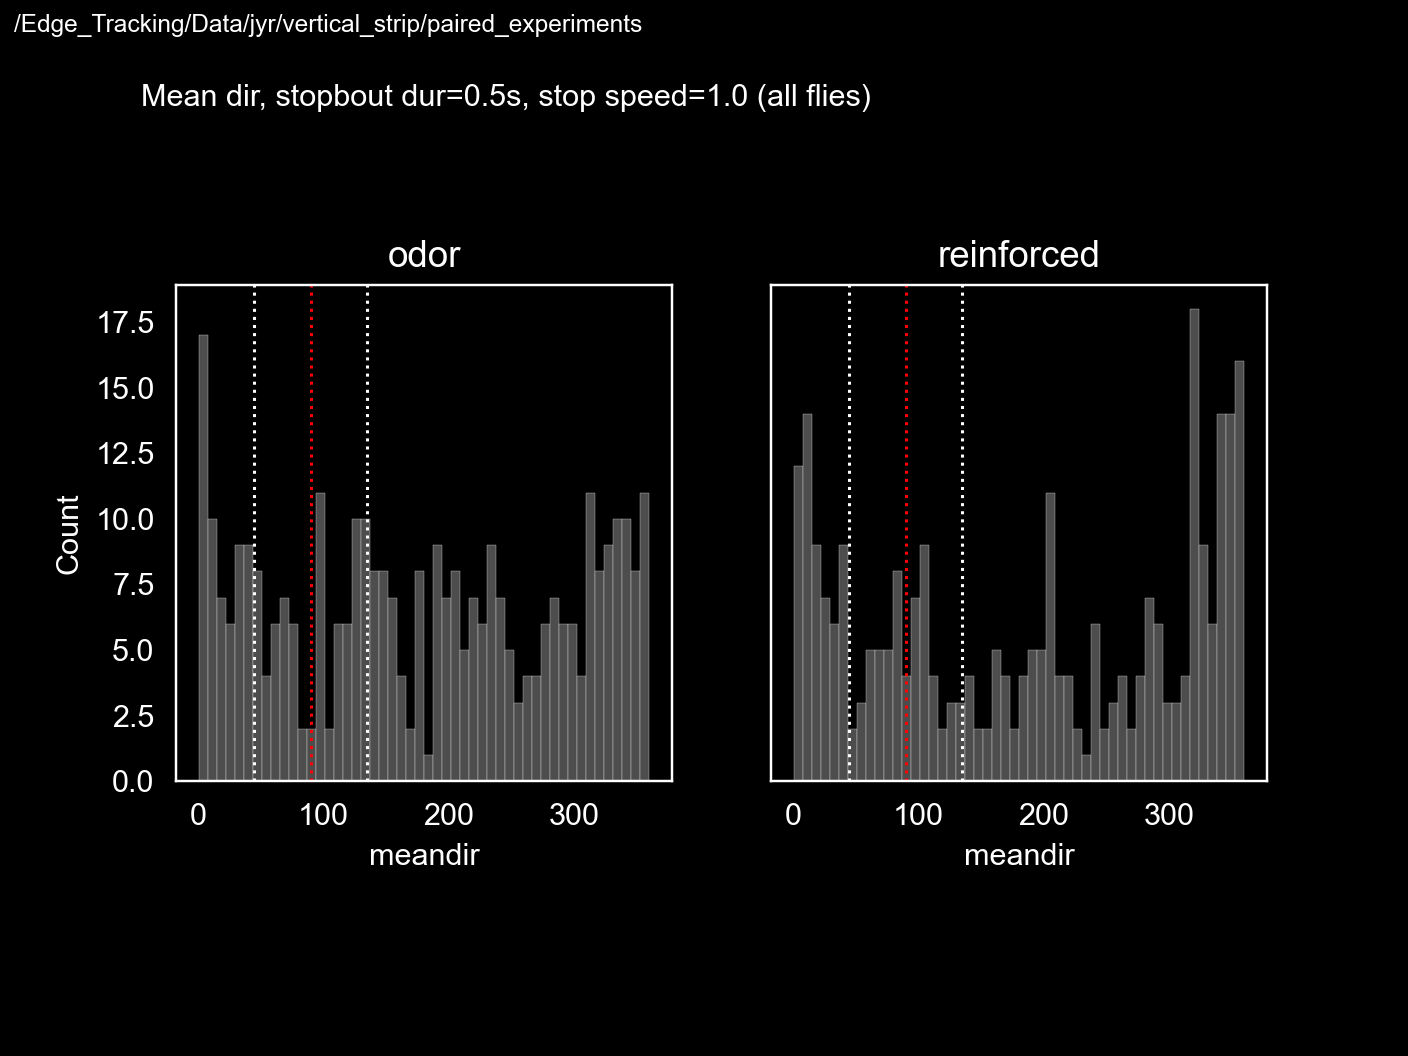

In [574]:
# Construct figure and axis to plot on
fig, axn = pl.subplots(1, 2, sharex=True, sharey=True) #subplot_kw=dict(projection='polar'))
# Visualise by area of bins
#ax=axn[0]
for ax, cond in zip(axn, ['odor', 'reinforced']):
    sns.histplot(data=mdf[mdf['condition'].isin([cond])], x='meandir', bins=50, ax=ax,
                 edgecolor='w', linewidth=0.1, facecolor=[0.3]*3, alpha=0.5)
    ax.set_title(cond)
    ax.axvline(x=45, color='w', lw=1, linestyle=':')
    ax.axvline(x=135, color='w', lw=1, linestyle=':')
    ax.axvline(x=90, color='r', lw=1, linestyle=':')
    ax.set_box_aspect(1)
    

title = 'Mean dir, stopbout dur={:.1f}s, stop speed={:.1f} (all flies)'\
            .format(stopdur_thresh, speed_thresh)
fig.text(0.1, 0.9, title)

util.label_figure(fig, fig_id)
figname = 'meandir_after_stop_outbouts_all-flies'
pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))